## Lending Club Credit Risk Modeling
- In this project, I will build three **machine learning** models to predict the three components of expected loss in the context of **credit risk modeling** at the **Lending Club** (a peer-to-peer credit company): Probability of Default (PD), Exposure at Default (EAD) and Loss Given Default (LGD). The expected loss will be the product of these elements: **Expected Loss (EL) = PD * EAD * LGD.** The PD Model will be used to stablish a credit policy, deciding wheter to grant a loan or not for new applicants (application model) based on their credit scores. The EAD and LGD Models will be used along with the PD Model to estimate the Expected Loss (EL) from each loan in order to assess the capital the institution needs to hold to protect itself against defaults.
- The PD modelling encompasses a binary classification problem with target being 1 in case of non-default and 0 in case of default. A Logistic Regression model will be built. 
- The LGD and EAD modelling encompasses a beta regression problem, that is, a regression task in which the dependent variable is beta distributed.
- The **solution pipeline** is based on the **crisp-dm** framework:
    1. Business understanding.
    2. Data understanding.
    3. Data preparation.
    4. Modelling.
    5. Validation.
    6. Deployment.
- Below, I will introduce **information** about the **company**, the **business problem**, the **project objectives and benefits**, and some important **concepts** to have in mind, given that I am dealing with a credit risk problem.

## Lending Club
- **What is the Lending Club?:**
    - LendingClub is a **peer-to-peer lending platform** that facilitates the borrowing and lending of money directly between individuals, without the need for traditional financial institutions such as banks. The platform operates as an online marketplace, connecting borrowers seeking personal loans with investors willing to fund those loans.

## Business Problem: Managing Default Risks and Optimizing Returns
- **What is the business problem?**
    - LendingClub faces a significant business challenge related to **managing default risks effectively** while **optimizing returns** for its investors. The platform facilitates peer-to-peer lending, connecting borrowers with investors, and relies on **accurate risk assessments to maintain a sustainable and profitable lending ecosystem.** Thus, the CEO wants us to provide insights about which factors are associated with credit risk in Lending Club's operations, and to construct models capable of predicting the probability of default for new applicants and possible losses on its loans in order to establish a credit policy, deciding when to grant a loan or not for an applicant. An important observation is that the CEO wants these models to be easy to understand. Since our company works on the internet, making customers happy and being clear is really important. So, we need to be able to explain why we decide to approve or deny a loan.
- **Which are the project objectives and benefits?**
    1. Identify the factors associated with credit risk in the form of business insights.
    2. Develop an accurate Probability of Default (PD) Model, constructing a scorecard. This will allow Lending Club to decide wheter to grant a loan or not to a new applicant (application model), based on credit scores.
    3. Develop Exposure at Default (EAD) and Loss Given Default (LGD) Models, to estimate the Expected Loss in loans. This will allow Lending Club to hold sufficient capital to protect itself against default in each loan.
    4. Improve risk management and optimize returns by selecting a cut-off point or creating risk categories to approve loans based on our models' results. With this, we intend to establish a credit policy, trying to balance risk and ROI of Lending Club's assets.
    5. Apply model monitoring and maintenance techniques to safeguard our results from population instability, characterized by significant changes in loan applicants' characteristics. This will allow us to understand whether the built model is still useful in the future or whether the loan applicants characteristics changed significantly, such that we will need to redevelop it.

## Credit Risk Modeling Concepts: The Context of the Problem
- **Financial institutions**, like LendingClub and online lending platforms, **make money by lending to people and businesses.** When they lend money, they **charge interest**, which is a significant source of their **profits**. **Managing credit risk well is crucial** for these institutions. This means ensuring that borrowers pay back their loans on time to avoid losses.
- **Credit risk** is the possibility that a borrower might not fulfill their financial obligations, leading to a loss for the lender. If a borrower fails to meet the agreed-upon terms, it's called a "default," and it can result in financial losses for the lender. The **default** definition is associated with a time horizon. For example, if a borrower hasn't paid their debt within 90 days of the due date, they are considered in default.
- In the credit market, important **rules** help keep things honest and clear. **Basel III** is one such set of rules, making sure banks have **enough money (capital requirements)** and follow **guidelines for assessing loan risks**. The **Internal Rating-Based Approach (IRB-A)** lets banks figure out credit risks using concepts like Probability of Default (PD), Exposure at Default (EAD), and Loss Given Default (LGD). Another rule, **International Financial Reporting Standard 9 (IFRS 9)**, gives standards for measuring financial assets. It's special because it looks at the chance of a loan not being paid back over its entire life, unlike Basel, which checks it for one year. These rules help banks have enough money, handle risks well, and keep the credit market steady and trustworthy.
- The **"expected loss (EL)"** is the average estimated loss that a lender can expect from loans that default. It involves three factors: the **probability of default (likelihood of a borrower defaulting)**, **loss given default (portion of the amount the bank is exposed to that can't be recovered in case of default)**, and **exposure at default (potential loss at the time of default, considering the outstanding loan amount and other factors)**.
- **LendingClub**, operating as a peer-to-peer lending platform, uses a **"PD Model/Credit Scoring Model" to assess borrowers' creditworthiness using credit scores** from a scorecard. This helps determine the **likelihood of loan repayment**, guiding the decision to **approve or deny the loan.** The **required capital to guard against default** for each loan is calculated using **EAD and LGD Models** to estimate the **Expected Loss (EL)**, contributing to minimizing risk in credit operations.
- When creating a Credit Scoring Model, which assesses creditworthiness for loan approval, using data available at the time of the application is considered an **"application model."** It is distinct from a "behavior model." This is the model I will build here.
- A **"credit policy"** is a set of guidelines that financial institutions follow to evaluate and manage lending risk. It involves setting a cut-off point, a threshold based on credit scores, or risk categories, to decide whether to approve or reject loan applications. Another factors such as the expected ROI for each loan application are included.
- **"Return on Investment (ROI)"** is a key measure of loan profitability. Balancing ROI with risk is vital for effective credit policy management. While higher-risk loans may offer more significant potential returns, they also come with a higher chance of default.

In **this notebook** I intend to perform an **exploratory data analysis**, necessary to obtain valuable insights about credit risk in Lending Club's operations, encompassing the first and second steps of crisp-dm framework. The objective here is to find these insights and investigate the information we have through univariate, bivariate and multivariate analysis of the available features, diagnosing Lending Club's past loans and deciding preprocessing techniques to be applied. Finally, the rationale behind each decision is explained in detail below.

#### 2.0 Importing the libraries

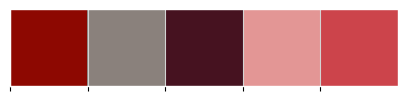

In [23]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Utils.
from src.eda_utils import *

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
#mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

#### 2.1 Collecting the data
- The data contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and the latest payment information. 
- It is much more clean after the data cleaning task performed, including most of the relevant variables in its correct data types, some missing and outlier values already treat and reduced memory usage. Moreover, it is already in chronological order of loans. Thus, in this step I will just quickly check general information and remaining missing values for further treatments.
- This include consumer loans, as explained above in Lending Club's services, and encompasses data available at the moment of the application. Thus, it will be used to build an application model.

In [24]:
parquet_file_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/large_files/clean_loan_data_2007_2014.parquet'
df = pd.read_parquet(parquet_file_path)

In [25]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,default
0,25000,25000,36,11.89,829.099976,B,B4,0,RENT,85000.0,Verified,2009-08-01,debt_consolidation,CA,19.480000,0,0,NaN,10,0,28854,52.099998,42,f,0.0,29324.320312,25000.000000,4324.319824,0.000000,0.000000,0.000000,7392.080078,0.0,0,NaN,NaN,NaN,281,1
1,1000,1000,36,16.08,35.200001,F,F2,0,RENT,30000.0,Not Verified,2008-07-01,debt_consolidation,IL,23.840000,0,1,NaN,9,0,10125,90.400002,15,f,0.0,1207.760010,999.989990,207.770004,0.000000,0.000000,0.000000,538.969971,0.0,0,NaN,NaN,NaN,192,1
2,7000,7000,36,10.71,228.220001,B,B5,0,RENT,65000.0,Not Verified,2008-05-01,credit_card,NY,14.290000,0,0,NaN,7,0,33623,76.699997,7,f,0.0,8215.450195,7000.000000,1215.449951,0.000000,0.000000,0.000000,228.479996,0.0,0,NaN,NaN,NaN,202,1
3,7000,7000,36,16.08,246.380005,F,F2,10,MORTGAGE,189500.0,Verified,2008-04-01,debt_consolidation,CA,22.469999,0,4,0.0,16,0,150971,92.300003,31,f,0.0,1231.900024,783.460022,448.190002,0.000000,0.250000,0.045000,246.380005,0.0,0,NaN,NaN,NaN,347,0
4,25000,25000,36,16.99,891.200012,D,D3,1,RENT,70000.0,Verified,2014-08-01,debt_consolidation,NY,10.500000,0,0,41.0,10,0,19878,66.300003,17,f,0.0,6073.100098,1634.650024,1038.949951,44.560001,3354.939941,603.889221,935.760010,0.0,0,0.0,34561.0,30000.0,206,0


In [26]:
df.tail()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,default
466280,4000,4000,36,8.19,125.699997,A,A5,0,MORTGAGE,24000.0,Not Verified,2014-12-01,home_improvement,SD,10.000000,0,0,NaN,9,3,7245,32.099998,13,f,2773.850098,1505.670044,1226.150024,279.519989,0.0,0.0,0.0,125.699997,0.0,0,652.0,62585.0,22600.0,331,1
466281,12000,12000,36,11.44,395.369995,B,B4,3,RENT,68000.0,Not Verified,2014-12-01,debt_consolidation,OR,12.970000,1,0,9.0,6,0,6989,42.400002,21,f,0.000000,13100.910156,12000.000000,1100.910034,0.0,0.0,0.0,9158.650391,0.0,0,2867.0,6989.0,17400.0,221,1
466282,2000,2000,36,15.99,70.309998,D,D2,7,RENT,37000.0,Not Verified,2014-12-01,other,AZ,16.190001,2,1,5.0,9,0,4533,20.100000,22,f,1435.930054,839.280029,564.070007,275.209991,0.0,0.0,0.0,70.309998,0.0,0,0.0,19342.0,22500.0,283,1
466283,16000,16000,60,11.44,351.399994,B,B4,6,OWN,109777.0,Verified,2014-12-01,debt_consolidation,VA,11.630000,1,0,12.0,7,0,7253,60.400002,14,w,13484.410156,4191.379883,2515.590088,1675.790039,0.0,0.0,0.0,351.399994,0.0,0,0.0,373743.0,12000.0,166,1
466284,15000,15000,60,12.39,336.640015,C,C1,10,RENT,78000.0,Source Verified,2014-12-01,debt_consolidation,VA,12.030000,0,0,NaN,6,0,138008,29.000000,17,w,12690.599609,4028.000000,2309.399902,1718.599976,0.0,0.0,0.0,336.640015,0.0,0,0.0,149140.0,184500.0,275,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 39 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_amnt                    int32         
 1   funded_amnt                  int32         
 2   term                         int8          
 3   int_rate                     float32       
 4   installment                  float32       
 5   grade                        category      
 6   sub_grade                    category      
 7   emp_length                   int16         
 8   home_ownership               category      
 9   annual_inc                   float32       
 10  verification_status          category      
 11  issue_d                      datetime64[ns]
 12  purpose                      category      
 13  addr_state                   category      
 14  dti                          float32       
 15  delinq_2yrs                  int16         
 16  inq_las

- It is possible to see that the variables are in the correct data types, with optimized memory usage.

In [28]:
missing_df = df.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / df.shape[0] * 100, 3)
missing_df.head(10)

,count,pct
mths_since_last_delinq,250322,53.688
total_rev_hi_lim,70247,15.066
tot_cur_bal,70247,15.066
tot_coll_amt,70247,15.066
revol_util,311,0.067
collections_12_mths_ex_med,116,0.025
total_rec_int,0,0.000
total_acc,0,0.000
initial_list_status,0,0.000
out_prncp,0,0.000


- It is possible to see that there are some missings that will require further treatment in data preprocessing step, including imputations with mean/median and so on.

#### 2.2 Split the data
- In the context of credit it's important to use an **out-of-time split** instead of an out-of-sample split because we want to understand how well the model, trained with past data, can predict the default of credit applicants in a future time. 
- The data was already sorted in data cleaning task, providing a chronological order for the loans. Thus, we only need to separate the first **80%** of the data for **training** and the remaining **20%** of the data for **testing**.
- I'll split the data first because the **test set** should contain data that the model hasn't encountered before, mimicking a **real-world production scenario.** So, I'll **set it aside now** and only use it for the final evaluation of the model later on.
- Furthermore, my plan is to examine the data for making **decisions** about **preprocessing**, such as determining which categories should be grouped together and how to create dummy variables. It's crucial to conduct this analysis solely on the **training data** to **prevent issues** like data leakage and overfitting, ensuring a reliable final performance estimate.

In [25]:
# Out-of-time split. 80% training, 20% testing.
train, test = np.split(df, [int(.80 * len(df))])
train['set'] = 'train'
test['set'] = 'test'

In [30]:
# Observing train and test default rates.
print(f"Train default rate: {train['default'].value_counts(normalize=True)}.")
print()
print(f"Test default rate: {test['default'].value_counts(normalize=True)}.")

Train default rate: default
1    0.880151
0    0.119849
Name: proportion, dtype: float64.

Test default rate: default
1    0.932859
0    0.067141
Name: proportion, dtype: float64.


- It is possible to see that test data applicants present a lower default rate.

In [4]:
# Assessing train and test sets dimensions.
print(f'Train set has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test set has {test.shape[0]} rows and {test.shape[1]} columns.')

Train set has 373004 rows and 40 columns.
Test set has 93252 rows and 40 columns.


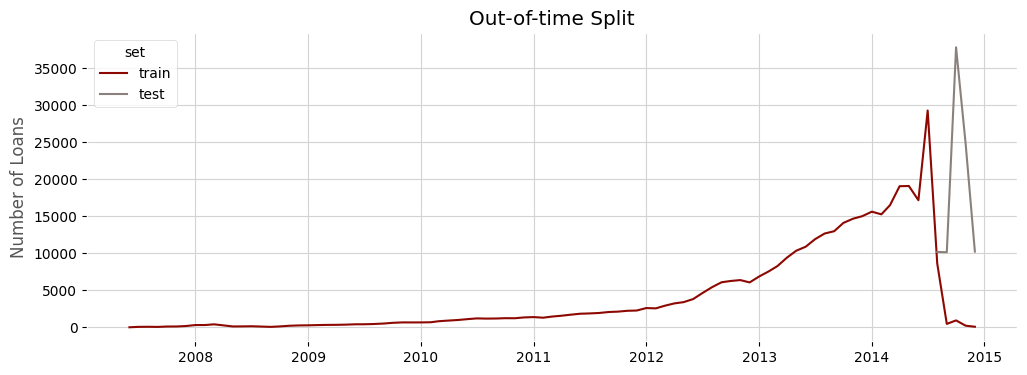

In [4]:
# Plotting the out-of-time split.
train_test = pd.concat([train, test])
train_test = train_test.groupby(['issue_d', 'set'])['default'].count().reset_index().rename(columns={'default': 'loans'})

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Out-of-time Split')
sns.lineplot(train_test, x='issue_d', y='loans', hue='set', ax=ax)
plt.xlabel('')
plt.ylabel('Number of Loans')
plt.show()

- The out-of-time split was successfully made.
- It is possible to see an increasing trend for the number of loans over time.

#### 2.3 Descriptive Statistics
- I will assess **descriptive statistics** of the numerical variables in order to obtain an initial broad view of the features **distributions**, possible **inconsistent values and outliers.**

In [33]:
train.describe().T

,count,mean,min,25%,50%,75%,max,std
loan_amnt,373004.0,14187.79363,500.0,8000.0,12000.0,20000.0,35000.0,8225.843831
funded_amnt,373004.0,14155.951612,500.0,8000.0,12000.0,20000.0,35000.0,8210.035411
term,373004.0,42.355878,36.0,36.0,36.0,60.0,60.0,10.589815
int_rate,373004.0,13.9716,5.42,10.99,13.98,16.780001,26.059999,4.340558
installment,373004.0,431.151672,15.67,255.330002,380.559998,565.219971,1409.98999,243.258698
emp_length,373004.0,5.716738,0.0,2.0,6.0,10.0,10.0,3.736419
annual_inc,373004.0,72970.6875,1896.0,45000.0,62435.0,88000.0,7446395.0,54015.792969
issue_d,373004,2013-05-13 17:31:12.250163200,2007-06-01 00:00:00,2012-12-01 00:00:00,2013-09-01 00:00:00,2014-04-01 00:00:00,2014-12-01 00:00:00,NaN
dti,373004.0,16.823301,0.0,11.14,16.559999,22.32,39.950001,7.60946
delinq_2yrs,373004.0,0.269453,0.0,0.0,0.0,0.0,29.0,0.766153


Insights:
- The average funded amount of the loans is approximately $14,155. However, this value can vary significantly, with a standard deviation of $8,210. The minimum funded amount is $500, and the maximum is $35,000. Examining the Interquartile Range (IQR), we find that half of the loans fall between $8,000 and $20,000. This provides an interesting insight into Lending Club's credit approval approach. They seem to be cautious, not providing funding for extremely high amounts on their loans.
- The average interest rate is about 14%. Looking at the middle range, half of the loans had interest rates between 11% and 16.8%, according to the Interquartile Range (IQR). Additionally, the interest rates range from a minimum of 5.42% to a maximum of 26%. This provides an insightful perspective on Lending Club's credit approval process. It seems they generally apply fair and reasonable interest rates to their loans.
- 75% of the borrowers have been employed for at least 2 years. This suggests that having a steady job is important for Lending Club to approve a loan.
- The average annual income is $72,970, but this value can vary significantly, with a standard deviation of $54,015. Looking at the minimum ($1,896) and maximum ($7,446,395) values, and noticing that the mean is greater than the median, there might be outliers with higher incomes contributing to a right-skewed distribution.
- The average debt-to-income ratio is approximately 16.82%. Examining the percentiles, half of the customers have a DTI of up to 16.6%. This indicates that customers generally approach their debts cautiously, which might contribute to the reasonable default rate of 12%.
- The average credit utilization rate is 56%. Additionally, looking at the percentiles, more than half of the borrowers have a credit utilization of over 50% of their limits. This can be considered a high rate.
- Most of the values of the variables indicating delinquencies and inquiries are zero. This is expected, since 88% of the customers are good borrowers. Although they present this imbalancement, they might be useful and indicative of default/non-default. This will be investigated further.
- The average outstanding principal is $3,401, with a standard deviation of $5,600. This is acceptable since many borrowers must pay their debts soon, not becoming defaulters.
- Examining recoveries at this point doesn't provide much information. Most values are zero because the majority of customers are good borrowers. Consequently, the average recovery is $99. It could be insightful to examine the distribution of this variable specifically for defaulters.
- The total revolving high/credit limit appears to have one or more inconsistent outlier values, especially considering the maximum credit limit of $9,999,999. Further investigation is necessary to address this issue.

#### 2.4 Numerical and categorical variables
- I will evaluate which variables in the data are **numerical and categorical**. This will help plan distinct visualization and exploration strategies for each group. Additionally, it's crucial to examine the **cardinalities** of categorical features, as this will impact preprocessing techniques and the modeling step.

In [12]:
# Assessing which are the numerical and categorical features.
numerical_features = train.select_dtypes('number').columns.tolist()
numerical_features.remove('default')
categorical_features = train.select_dtypes('category').columns.tolist()
target = 'default'
print(f'There are {len(numerical_features)} numerical variables in the data. They are: {numerical_features}.')
print(f'There are {len(categorical_features)} categorical variables in the data. They are: {categorical_features}.')

There are 30 numerical variables in the data. They are: ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'mths_since_earliest_cr_line'].
There are 7 categorical variables in the data. They are: ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status'].


In [35]:
# Assessing categorical features cardinality.
for feature in categorical_features:
    print(f'{feature} - cardinality = {df[feature].nunique()}')
    print()
    print(df[feature].unique())
    print('-' * 150)

grade - cardinality = 7

['B', 'F', 'D', 'C', 'A', 'E', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
------------------------------------------------------------------------------------------------------------------------------------------------------
sub_grade - cardinality = 35

['B4', 'F2', 'B5', 'D3', 'C2', ..., 'G4', 'E1', 'G3', 'G5', 'G1']
Length: 35
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5']
------------------------------------------------------------------------------------------------------------------------------------------------------
home_ownership - cardinality = 6

['RENT', 'MORTGAGE', 'OWN', 'NONE', 'OTHER', 'ANY']
Categories (6, object): ['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']
------------------------------------------------------------------------------------------------------------------------------------------------------
verification_status - cardinality = 3

['Verified', 'Not Verified', 'Source Ve

- Home ownership has categories like 'none', 'other' and 'any' that don't contain useful information. I will decide what to do with them based on how they discriminate between good and bad borrowers further. For the other variables, I will do the same. Moreover, sub grade and address state have the highest cardinality, 35 and 50, respectively.

#### 2.5 Exploratory data analysis
- In this step, I intend to explore the data to find valuable insights about credit risk in Lending Club's credit granting and decide how the preprocessing will be made. Thus, I will do univariate, bivariate and multivariate analysis below.

#### 2.6 Univariate analysis
- In this analysis, I intend to observe the **variables distributions**, searching for **typical values, asymmetries, outliers**, etc.

#### 2.6.1 What is the default rate in Lending Club's loans?

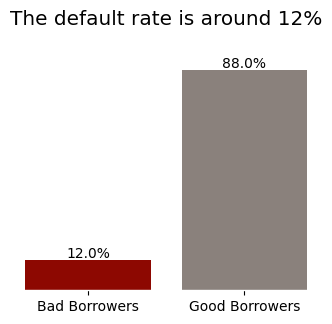

In [36]:
fig, ax = plt.subplots(figsize=(4, 3))

default_grouped = train.groupby(['default'])[['default']].count().rename(columns={'default': 'count'}).reset_index()
default_grouped['pct'] = default_grouped['count'] / default_grouped['count'].sum() * 100

bars = ax.bar(x=default_grouped['default'], height=default_grouped['pct'], color=instyle_palette, width=0.8)
for bar, pct in zip(bars, default_grouped['pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')
ax.set_title('The default rate is around 12%', pad=25)
ax.set_xticks(ticks=default_grouped['default'], labels=['Bad Borrowers', 'Good Borrowers'])
ax.yaxis.set_visible(False)
ax.grid(False)

- The default rate is around 12%. This motivates our project, there is indeed space for improvement in Lending Club's credit granting.
- We are dealing with an imbalanced classification problem.

#### 2.6.2 How are the numerical features distributed?

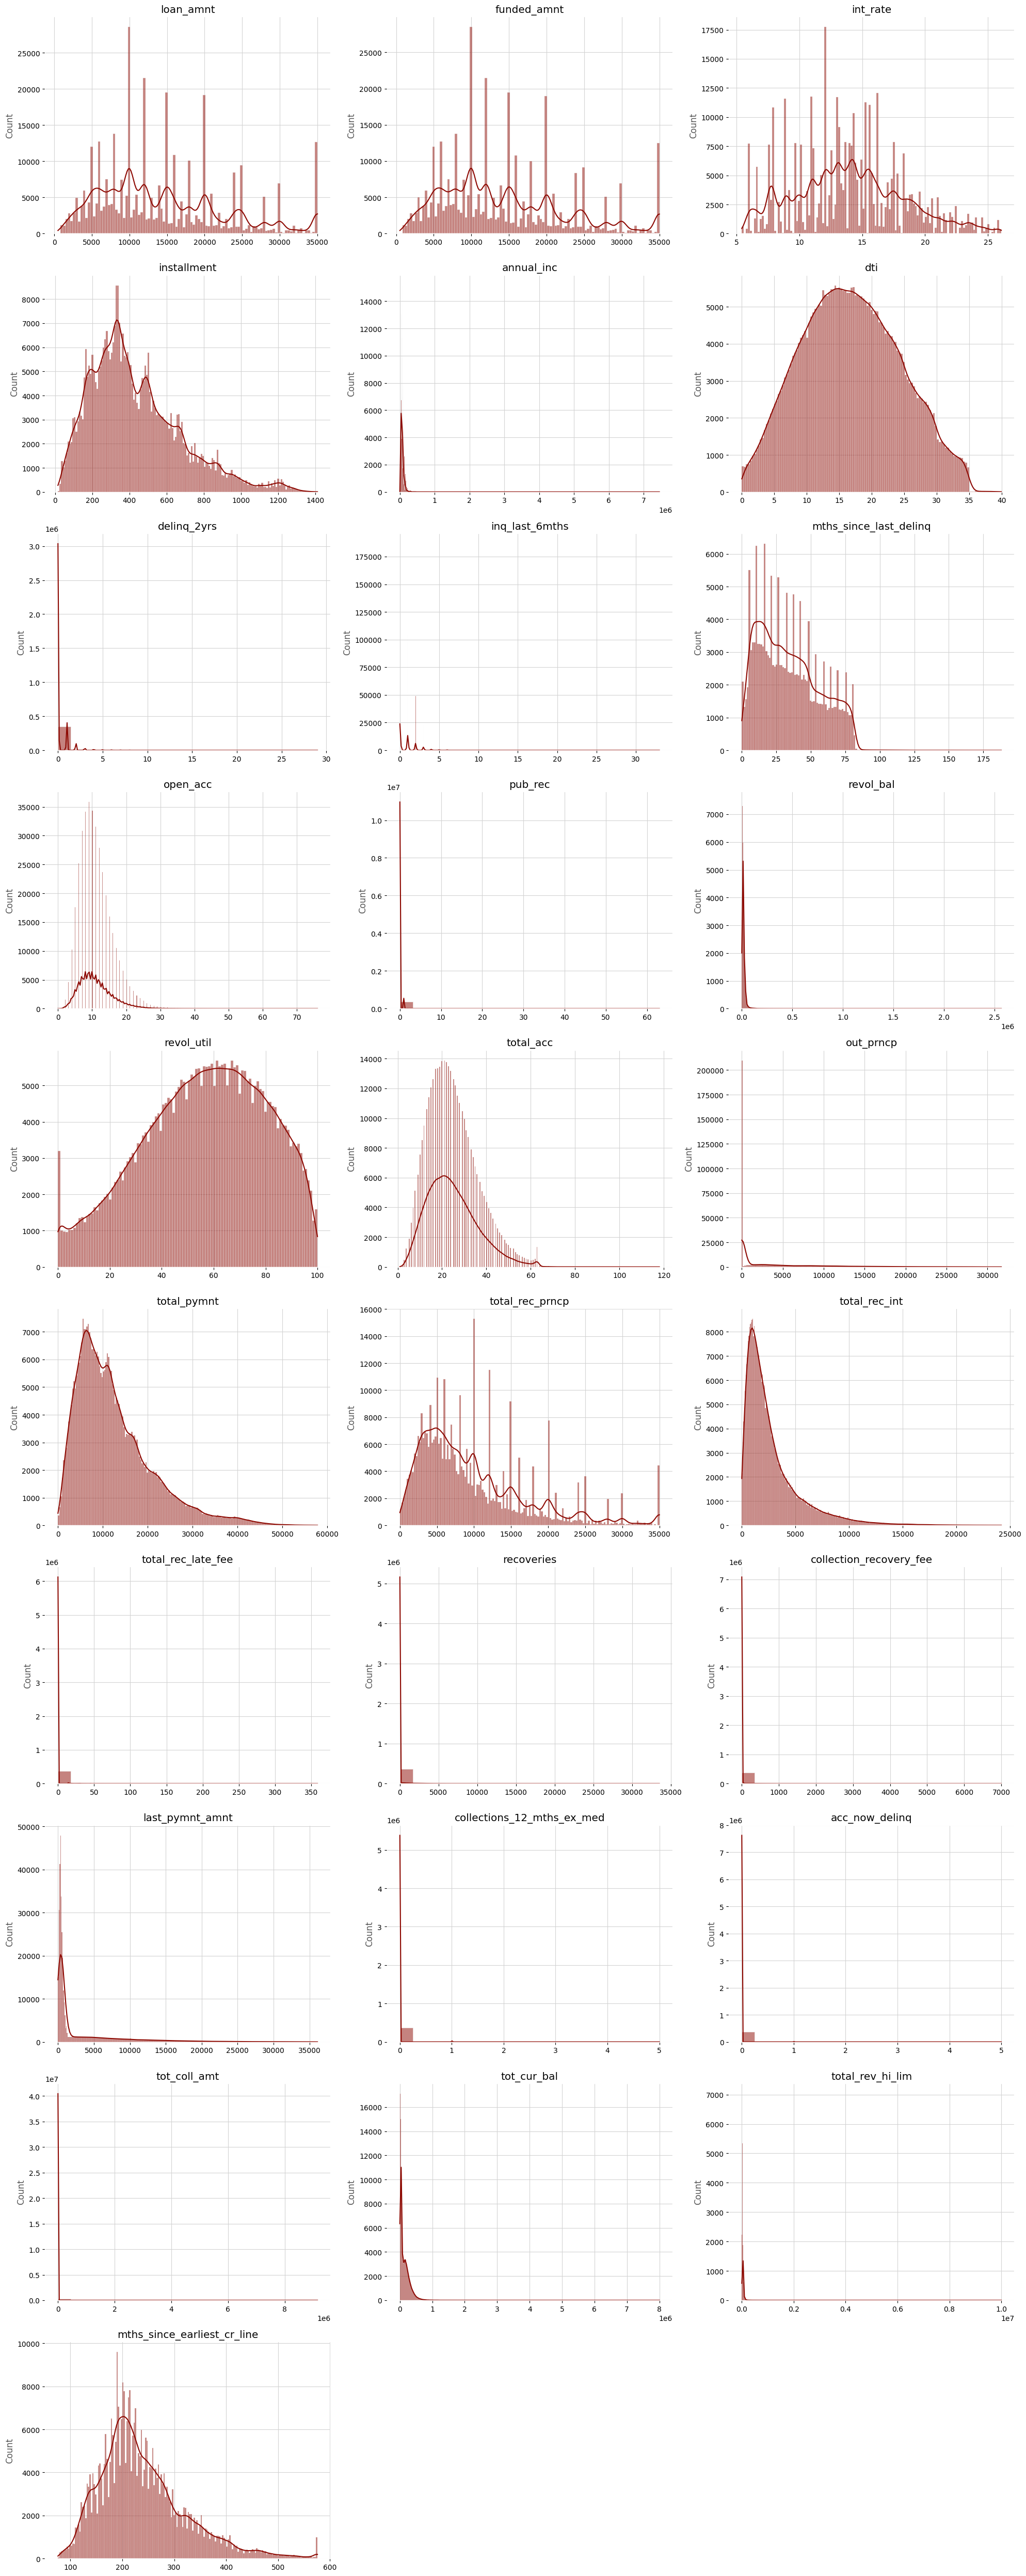

In [37]:
# Separating numerical features that can be better visualized in a countplot from numerical features to be visualized in a histogram.
histogram_features = [x for x in numerical_features if x not in set(['term', 'emp_length'])]
# Plotting numerical features distributions.
sns_plots(train, histogram_features, kde=True)

Insights:
- Annual income presents a strongly right skewed distribution. Most of the applicants' incomes are concentrated in lower values, while there are some outliers with extremely high incomes. I will investigate this outliers in the next topic.
- The way people's debts compare to their incomes follows a pattern similar to a normal curve. The majority of customers have a debt-to-income ratio of about 16. Some have lower ratios, almost zero, meaning they owe very little relative to their income. Others have higher ratios, close to 40, indicating they owe a significant amount compared to what they earn.
- Many variables show a very skewed distribution to the right because a large number of values are zero (sometimes more than 75%, according to percentiles). Some outliers in these variables have exceptionally high values. This is the case for delinq_2yrs, inq_last_6_mths, pub_rec, out_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, collections_12_mths_ex_med, acc_now_delinq, and tot_coll_am. This is understandable since most customers are good borrowers, but a small portion may have late payments, outstanding debts, or other issues. These variables might not be helpful for prediction (some may not be available at the time of prediction and should be removed to prevent data leakage). However, during the bivariate analysis, I'll explore how well they distinguish between good and bad borrowers. Based on that, I'll decide whether to keep or remove them.
- The distribution of open accounts has a shape resembling a normal curve on the left side. Typically, most customers have around 11 open accounts. However, if we look at the right side, there are outliers – borrowers with an unusually high number of open accounts, such as 70.
- The distribution of revolving balance and credit limit is heavily skewed to the right. Both variables have a minimum value of zero, and most borrowers have balances and credit limits concentrated around lower values. However, there are some extremely high outlier values, such as a $9,999,999 credit limit. In the next section, I will investigate these values further. Such high credit limits are questionable and may indicate inconsistent information, possibly due to errors like human mistakes.
- The majority of borrowers have been maintaining credit lines for approximately 20 years (and there are outliers in higher values), suggesting that Lending Club tends to attract and serve a more mature and experienced group of applicants. This observation aligns with the employee length data, indicating a profile of applicants who have been in the workforce for a substantial period.
- A concerning observation is that over half of the customers have a credit utilization rate of 50% or higher.

#### 2.6.3 Are there inconsistent outliers in the numerical features?

In [38]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=histogram_features)

There are 462633 outliers in the dataset.

Number (percentage) of outliers per feature: 

loan_amnt: 0 (0.0)%
funded_amnt: 0 (0.0)%
int_rate: 2081 (0.56)%
installment: 9207 (2.47)%
annual_inc: 15814 (4.24)%
dti: 24 (0.01)%
delinq_2yrs: 64005 (17.16)%
inq_last_6mths: 32692 (8.76)%
mths_since_last_delinq: 66 (0.02)%
open_acc: 7088 (1.9)%
pub_rec: 45658 (12.24)%
revol_bal: 17213 (4.61)%
revol_util: 0 (0.0)%
total_acc: 4933 (1.32)%
out_prncp: 33778 (9.06)%
total_pymnt: 13301 (3.57)%
total_rec_prncp: 13965 (3.74)%
total_rec_int: 25279 (6.78)%
total_rec_late_fee: 9389 (2.52)%
recoveries: 23246 (6.23)%
collection_recovery_fee: 22086 (5.92)%
last_pymnt_amnt: 46358 (12.43)%
collections_12_mths_ex_med: 2454 (0.66)%
acc_now_delinq: 1185 (0.32)%
tot_coll_amt: 35536 (9.53)%
tot_cur_bal: 9083 (2.44)%
total_rev_hi_lim: 15965 (4.28)%
mths_since_earliest_cr_line: 12227 (3.28)%


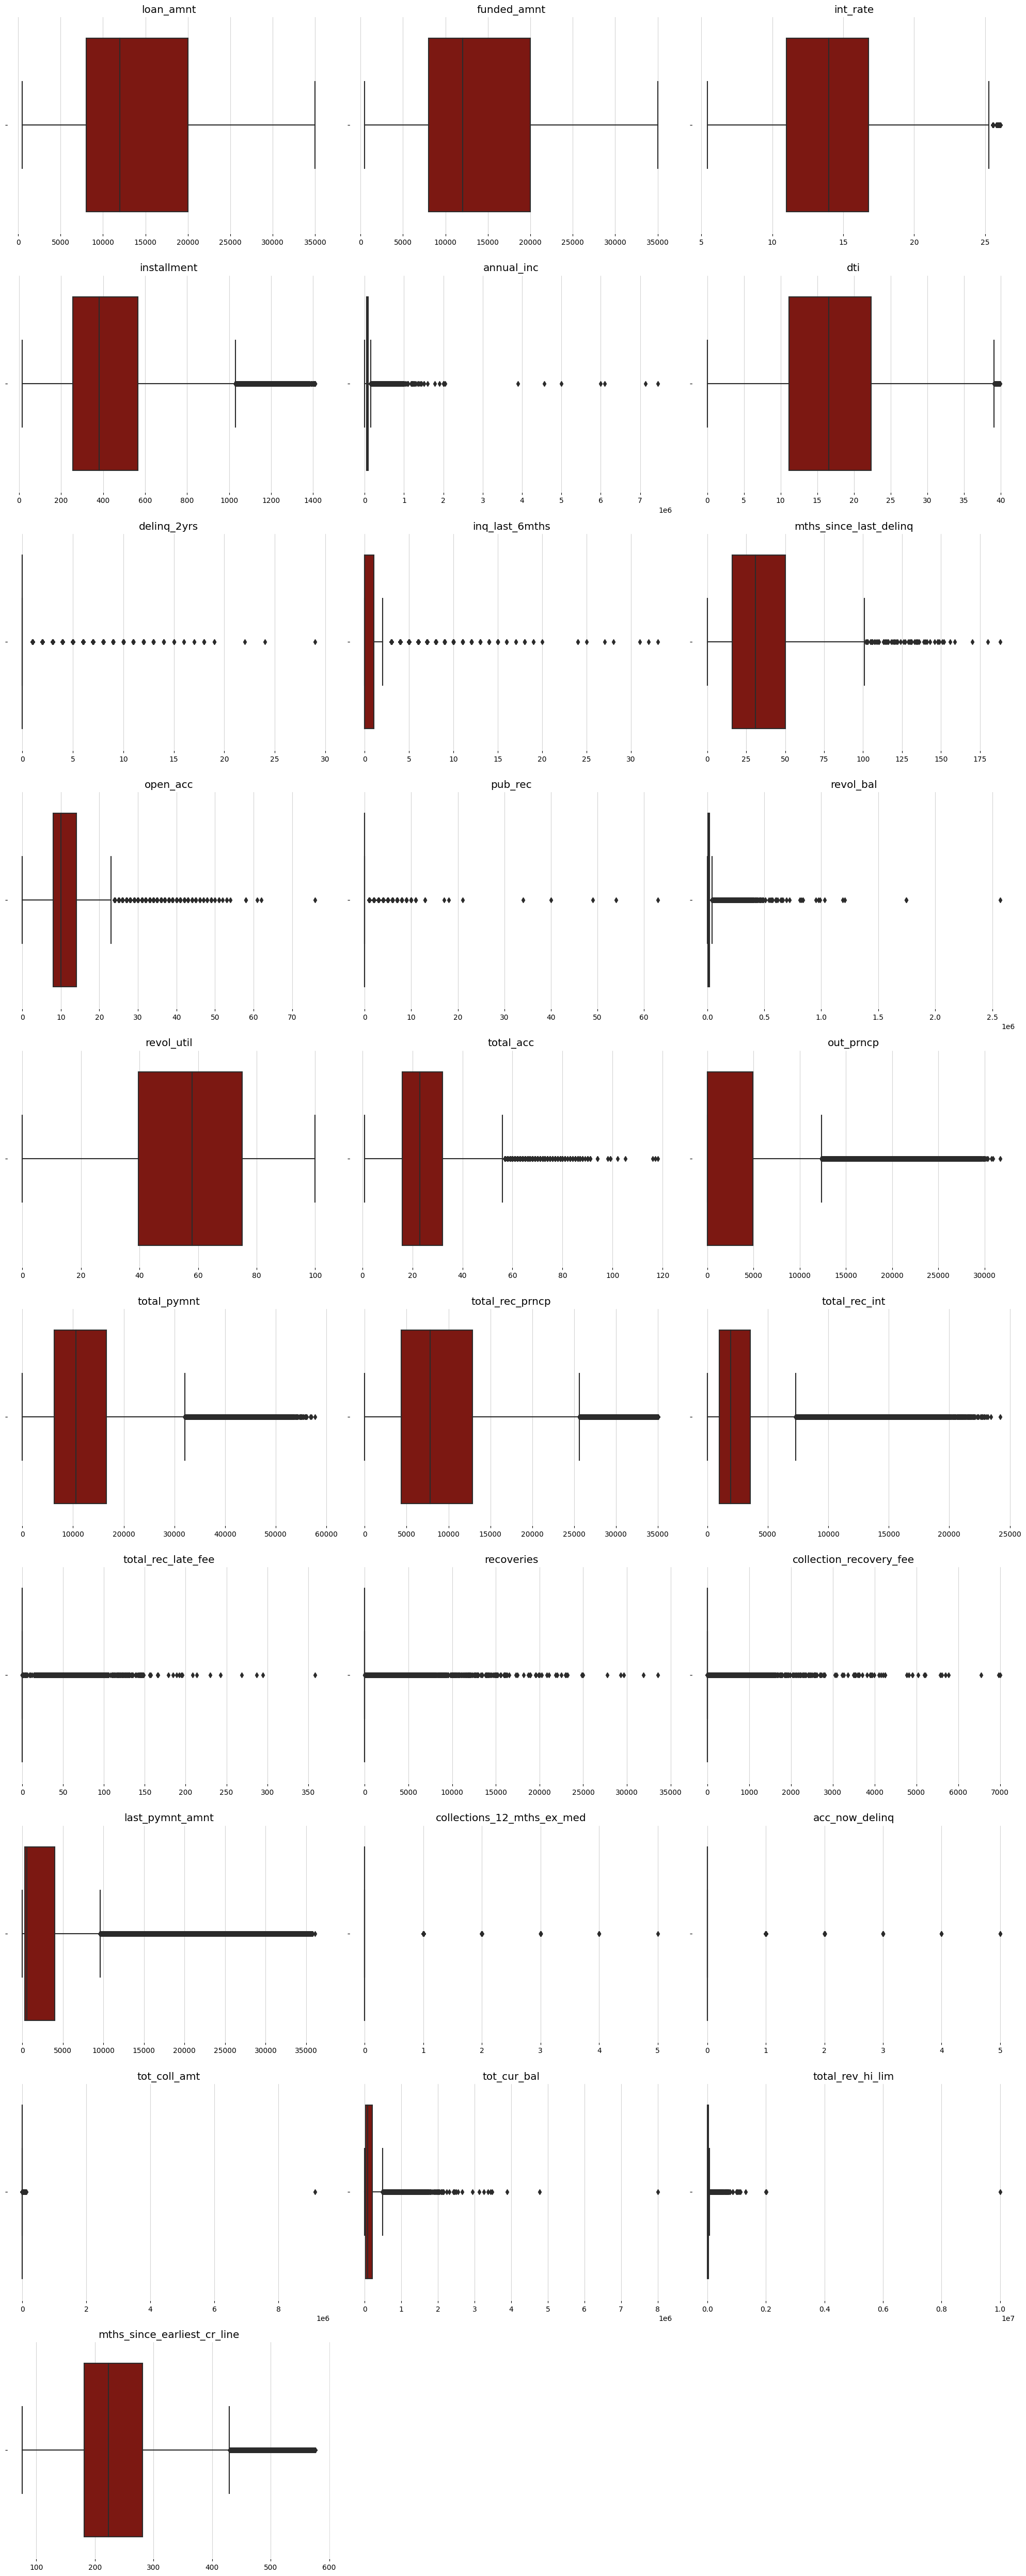

In [39]:
sns_plots(data=train, features=histogram_features, outliers=True)

In [40]:
# Investigating outliers in annual income.
train.loc[train['annual_inc'] > 3e6]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,default,set
11855,5000,5000,36,12.73,167.839996,C,C1,10,MORTGAGE,6000000.0,Source Verified,2010-05-01,home_improvement,CA,0.01,0,1,80.0,2,0,1434,37.700001,10,f,0.000000,5511.859863,5000.000000,511.859985,0.0,0.0,0.0,3845.250000,0.0,0,NaN,NaN,NaN,199,1,train
12351,25000,15500,60,10.62,334.079987,B,B3,3,MORTGAGE,3900000.0,Not Verified,2010-06-01,home_improvement,NM,0.20,0,3,NaN,12,0,3270,10.200000,32,f,0.000000,20037.019531,15500.000000,4537.020020,0.0,0.0,0.0,353.140015,0.0,0,NaN,NaN,NaN,215,1,train
95050,35000,35000,36,15.31,1218.609985,C,C2,10,MORTGAGE,5000000.0,Verified,2012-12-01,credit_card,NY,2.36,1,2,12.0,13,0,975800,0.000000,36,w,0.000000,43114.628906,35000.000000,8114.629883,0.0,0.0,0.0,58.029999,0.0,0,0.0,8000078.0,988000.0,279,1,train
97298,14825,14825,36,13.11,500.299988,B,B4,10,MORTGAGE,7141778.0,Source Verified,2012-12-01,debt_consolidation,GA,0.25,0,2,26.0,17,0,11351,70.900002,31,w,0.000000,17229.330078,14825.000000,2404.330078,0.0,0.0,0.0,8223.929688,0.0,0,0.0,69548.0,16000.0,256,1,train
106294,30000,30000,36,12.12,998.150024,B,B3,10,MORTGAGE,6100000.0,Verified,2013-02-01,debt_consolidation,MD,0.22,0,0,NaN,8,0,15219,94.500000,19,w,0.000000,34146.179688,30000.000000,4146.180176,0.0,0.0,0.0,18175.779297,0.0,0,0.0,329254.0,16100.0,164,1,train
248207,20000,20000,36,7.62,623.229980,A,A3,5,RENT,7446395.0,Source Verified,2014-02-01,debt_consolidation,NY,0.13,0,0,45.0,10,0,24494,50.700001,24,w,4130.560059,17911.060547,15869.440430,2041.619995,0.0,0.0,0.0,623.229980,0.0,0,0.0,31691.0,48300.0,291,1,train
330092,20000,20000,60,12.99,454.959991,C,C1,10,MORTGAGE,4560077.0,Source Verified,2014-06-01,debt_consolidation,UT,0.25,0,0,NaN,11,0,15429,36.000000,19,f,14999.559570,8644.240234,5000.439941,3643.800049,0.0,0.0,0.0,454.959991,0.0,0,0.0,41434.0,42800.0,140,1,train


In [41]:
# Investigating outliers in total_rev_hi_lim 
train.loc[train['total_rev_hi_lim'] > 2e6]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,default,set
96097,35000,35000,36,11.14,1148.180054,B,B2,10,MORTGAGE,400000.0,Verified,2013-01-01,debt_consolidation,FL,33.48,0,4,NaN,28,0,1743266,29.5,59,f,0.000000,35951.800781,35000.000000,951.799988,0.0,0.0,0.0,33656.699219,0.0,0,0.0,3471522.0,2013133.0,394,1,train
144326,28000,28000,36,8.90,889.090027,A,A5,1,MORTGAGE,1000000.0,Verified,2013-06-01,credit_card,CT,12.54,0,2,39.0,13,0,2568995,20.4,28,f,4351.810059,27557.230469,23648.189453,3909.040039,0.0,0.0,0.0,889.090027,0.0,0,0.0,3881449.0,9999999.0,371,1,train


In [42]:
# Investigating outliers in revol_bal.
train.loc[train['revol_bal'] > 1.5e6]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,default,set
96097,35000,35000,36,11.14,1148.180054,B,B2,10,MORTGAGE,400000.0,Verified,2013-01-01,debt_consolidation,FL,33.480000,0,4,NaN,28,0,1743266,29.500000,59,f,0.000000,35951.800781,35000.000000,951.799988,0.0,0.0,0.0,33656.699219,0.0,0,0.0,3471522.0,2013133.0,394,1,train
144326,28000,28000,36,8.90,889.090027,A,A5,1,MORTGAGE,1000000.0,Verified,2013-06-01,credit_card,CT,12.540000,0,2,39.0,13,0,2568995,20.400000,28,f,4351.810059,27557.230469,23648.189453,3909.040039,0.0,0.0,0.0,889.090027,0.0,0,0.0,3881449.0,9999999.0,371,1,train
215770,35000,35000,36,14.30,1201.329956,C,C1,10,MORTGAGE,400000.0,Verified,2013-11-01,other,FL,32.799999,0,3,NaN,28,0,1746716,38.599998,55,f,0.000000,34268.398438,29874.429688,4393.970215,0.0,0.0,0.0,1201.329956,0.0,0,0.0,3437283.0,1998700.0,399,0,train


- The outliers in annual_inc don't represent inconsistent information. It is natural that some applicants hold extremely high incomes. Moreover, just one of them were not verified, reinforcing these values are not incorrect.
- The same is true for total_rev_hi_lim and revol_bal. It is not possible to confirm that the $9,999,999 credit limit is wrong. 
- In all of these outliers, we see customers with good grades, verified incomes, loan amounts close to the limit and good borrowers. Thus, they are not likely to represent inconsistent information and will be maintained in the data. Moreover, although outliers might affect the coefficients estimation from our PD model, considering we have a huge amount of data and we will apply feature discretization to these variables, their effect will be minimized. For example, the $9,999,999 credit limit can be part of a category indicating credit_limits higher than 1 million, smoothing its discrepant effect.

#### 2.6.4 How are the categorical features distributed?

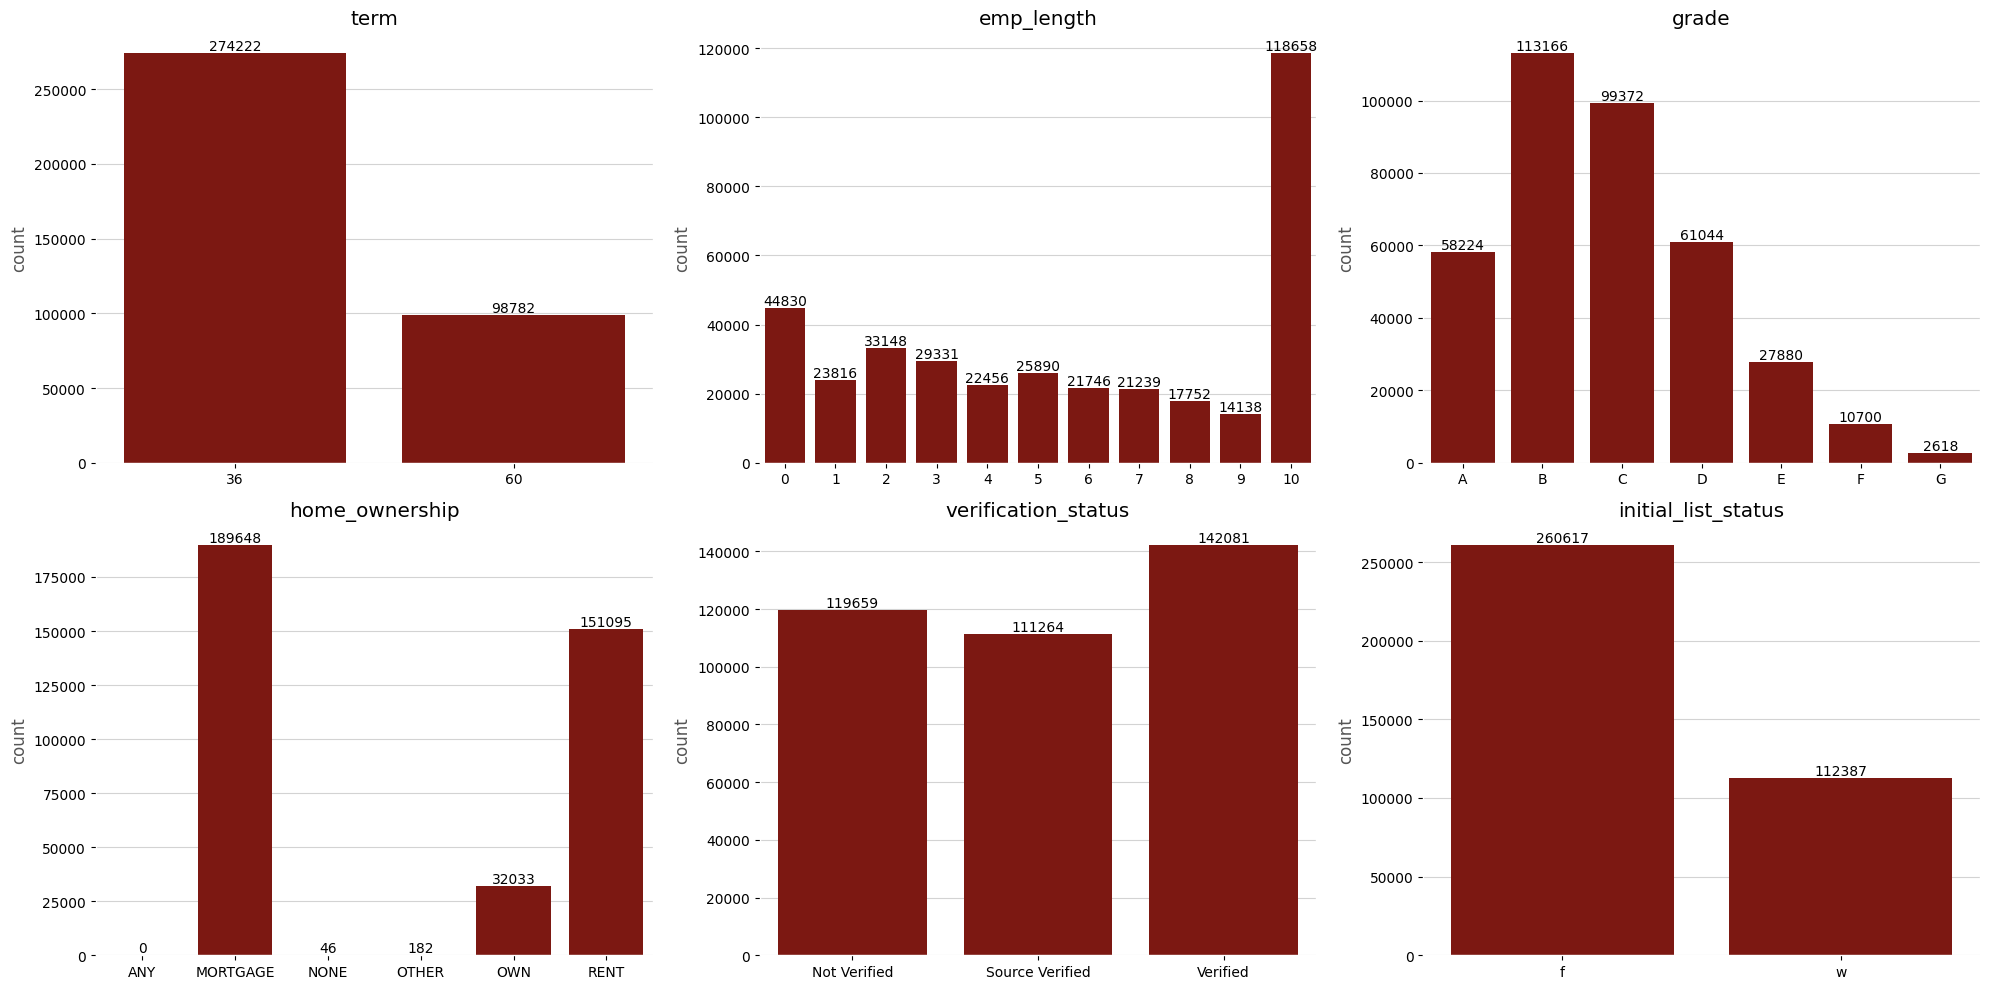

In [98]:
countplot_features = ['term', 'emp_length', 'grade', 'home_ownership', 'verification_status', 'initial_list_status']
sns_plots(data=train, features=countplot_features, countplot=True)

- Insights:
    - Almost three out of four loans, which is about 73.5%, last for a period of 36 months.
    - Over 30% of the customers have been employed for 10 years or more. Around 12% of customers are just starting their jobs with zero years of employment.
    - Over 90% of the customers either own a house through a mortgage or pay rent. About 8.5% of customers own their houses outright. The categories labeled as 'Other,' 'None,' and 'Any' have very small percentages. These might be combined or removed later during analysis based on how well they help distinguish between good and bad borrowers.
    - Nearly 90% of the customers have grades ranging from A to D, while grades F and G make up less than 4% of the data. Even though they are a small portion, grades F and G might be important in differentiating between good and bad borrowers. Further investigation will be conducted to confirm this.

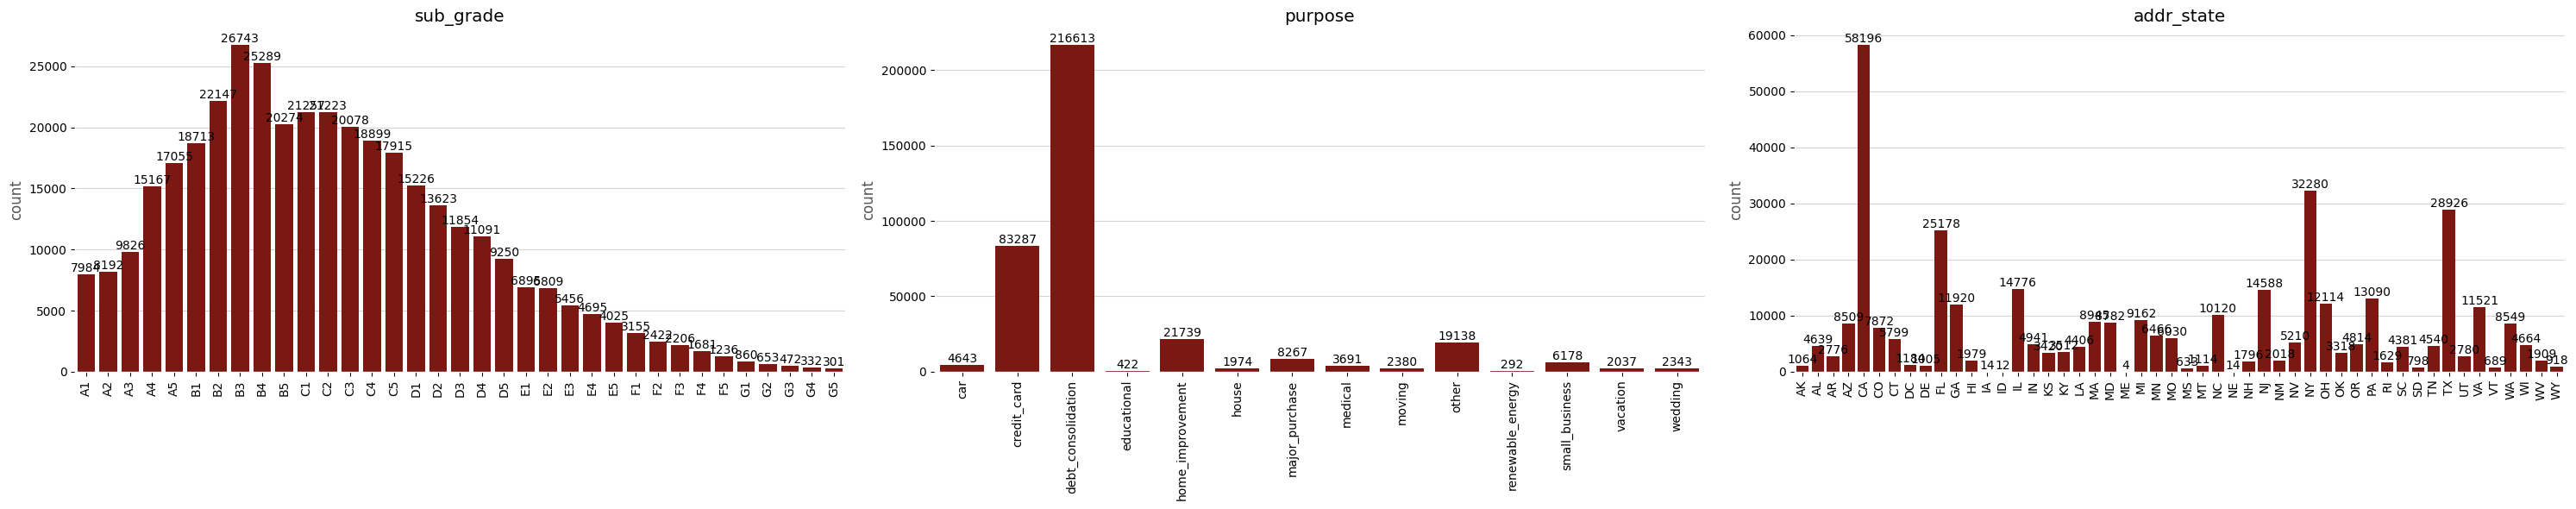

In [112]:
countplot_features = ['sub_grade', 'purpose', 'addr_state']
sns_plots(data=train, features=countplot_features, countplot=True, rotation=90)

Insights:
- The reason for taking out 80% of the loans is to either consolidate debt or use them for credit card payments. Almost all the other reasons for getting a loan make up less than 1% of the total loans. Thus, we must analyze how well each purpose discriminates between good and bad borrowers and decide whether to keep this variable or not.
- The states with the highest number of loans are California, New York, Texas, Florida, and Illinois, in that order. California stands out as the top state, making up more than 15% of all loans.

#### 2.7 Bivariate and multivariate analysis
- In this step, I intend to **analyze the relationships between the variables**. My primary focus is on understanding **how each predictor variable relates to the target variable, "default,"** which distinguishes each customer as either a **good or bad borrower**. Moreover, some **objectives** of this task include:
    - Analyze the **discriminatory power** of a **predictor variable.**
    - Identify atypical behaviors and patterns in the variables.
    - Identify **correlations** between predictor variables.
    - Analyze and refine **feature discretization.**
- In building a Logistic Regression PD Model, a crucial step is **discretizing numerical variables** through a process known as **"fine classing."** Here, we **break** down continuous variables into **categories**. Afterward, we evaluate **how well each category distinguishes between good and bad borrowers**, leading to **"coarse classing"** where we **group these categories.** This step is vital for interpretability, as each category turns into a dummy variable. An important observation as that we create n-1 dummies, separating one as a "reference category", the category with highest credit risk. Grouping them, referred to as bundling, **reduces** the model's complexity **(dimensionality)**, improving performance.
- The decision to bundle categories is often guided by the **Weight of Evidence (WoE)** metric. For categorical variables, we order categories by WoE and **bundle** those with **similar discriminatory power.** The process is similar for numerical variables, but here, we order by the variable itself due to its ordinal nature. Adjacent categories with similar WoE are bundled.
    - **WoE** measures how well each feature category discriminates between good and bad borrowers, its formula for a category (i) is:
        - **${WoE}_i = \ln\left(\frac{\%\text{good}_i}{\%\text{bad}_i}\right)$**
- A metric related to WoE is the **Information Value (IV)**. The information value is a measure that helps us understand how well a predictor variable can distinguish between different groups, like good and bad borrowers in our credit scoring scenario. It's calculated by taking the difference between the proportion of good borrowers among all the good ones and the proportion of bad borrowers among all the bad ones, with the values weighted by the Weight of Evidence (WoE), summed across all the categories of the independent variable. This metric is useful for comparing distinct categories bundling and deciding which variables should be included in a credit scoring formula, a pre-selection. However, there are more advanced methods for selecting features, and we will not use IV for it.
    - Information Value (IV) formula:
        - ${IV} = \sum_{i} (\% \text{Good}_i - \% \text{Bad}_i) \times \text{WoE}_i$
- Additionally, it's prudent to **bundle categories with low proportions of observations.** In such cases, WoE may be less reliable, and creating a dummy variable with a coefficient and weight based on a small number of data points can lead to **overfitting**. 
- An important decision is how many categories determine. Generally, based on the feature range, it is recommended from 10 to 20 categories using percentiles. Moreover, it is also recommended that each category must have at least 500 borrowers inside it.
- The entire feature discretization process, considering discriminatory power and bundling categories, will be executed during the preprocessing step. In this phase, we'll carefully examine and determine the specific preprocessing steps to be undertaken, considering the best approach and methodology.
- **Advantages of Feature Discretization:**
    - **Enhanced Understanding:** Allows a clearer understanding of the variable's relationship with loan status (good/bad), identifying categories with higher, neutral, and lower credit risk.
    - **Improved Communication:** Facilitates communication with analysts and business stakeholders, as discretized variables are more easily grasped than complex statistical visualizations like box plots.
    - **Ordinal Analysis:** For ordinal variables, discretization enables the analysis of whether risk variation aligns with the ordering of categories, revealing linear and monotonic relationships with the target variable.
    - **Handling Non-Monotonic Relationships:** In cases where the relationship between a quantitative variable and risk is not monotonic, discretization is beneficial, treating each category independently during dummy variable creation.
    - **Minimizing Asymmetries and Outliers:** Helps mitigate the impact of strong asymmetries and outliers by creating a category for observations above a certain value.
- **Disadvantages of Feature Discretization:**
    - **Information Loss:** Results in information loss as individuals with distinct values are grouped together and treated similarly.
    - **Boundary Effects:** Individuals close to category boundaries may be disproportionately affected, either benefiting or facing disadvantages.
    - **Increased Dimensionality:** Introduces an increase in dimensionality, potentially making the dataset more complex.
- Considering that the advantages outweigh the disadvantages, we will proceed with feature discretization analysis below.
- Moreover, we will **remove highly correlated variables** because it is essential to:
    - **Avoid Multicollinearity:** High correlation between predictors can lead to multicollinearity (although it is measured with the variance inflation factor (VIF), in practice, pearson correlation can give us a good advice), making it challenging to estimate the individual effect of each variable on the target.
    - **Enhance Model Interpretability:** Multicollinearity makes it difficult to interpret the contribution of each feature independently, compromising the clarity and reliability of coefficient estimates.
    - **Improve Model Stability:** Removing correlated features improves model stability, preventing inflated standard errors and unreliable coefficient estimates, which can adversely impact the predictive performance of the PD model.

#### 2.7.1 Are there features significantly correlated with each other?

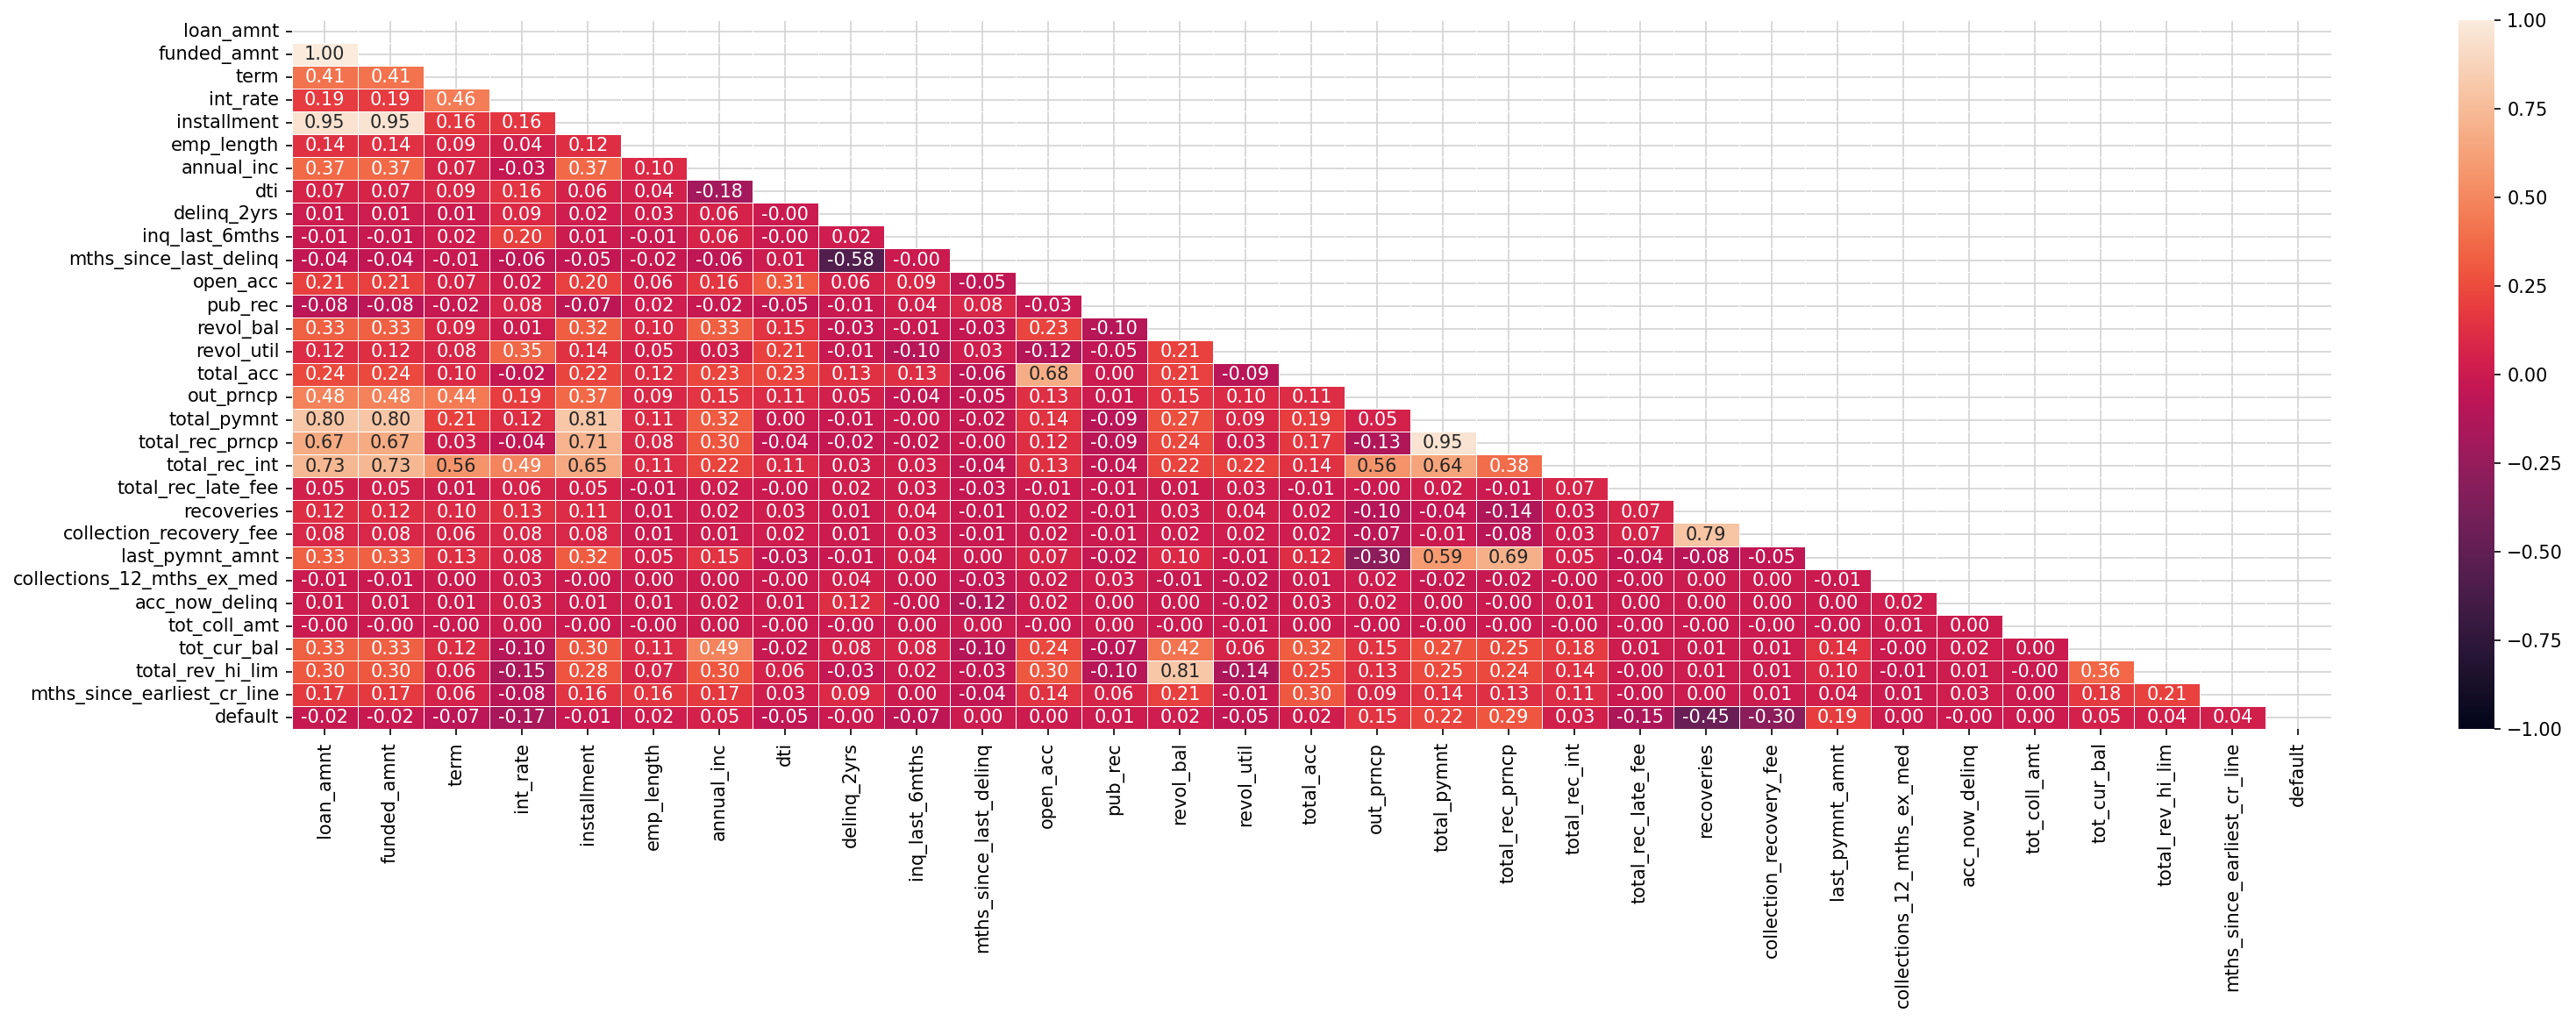

In [19]:
# Mask to remove the upper triangle.
mask = np.zeros_like(train.corr(method='pearson', numeric_only=True), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

# Correlation matrix.
corr_matrix = train.corr(method='pearson', numeric_only=True)

# Heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(corr_matrix,linewidths=0.25, fmt=".2f", annot=True, vmin=-1, vmax=1, mask=mask)
plt.show()

Insights:
- The credit limit and the revolving balance show a strong positive correlation of 0.81. This means that as the revolving balance increases, so does the credit limit, and vice versa. Since high correlation can lead to multicollinearity, and considering that the variable "total_rev_hi_lim" has a significant number of missing values while "revol_bal" does not, I plan to remove "total_rev_hi_lim" from further analysis. This is to address multicollinearity issues and focus on the available and less incomplete data provided by "revol_bal."
- Other variables, like total payment and loan amount, also show high correlations. This is anticipated because such variables are inherently linked. Additionally, since these variables won't be available at the time of prediction, they will be excluded later to avoid data leakage, ensuring that the model is not using information that wouldn't be accessible in a real-world scenario.

#### 2.7.2 On average, how is the credit amount funded according to the applicants characteristics?

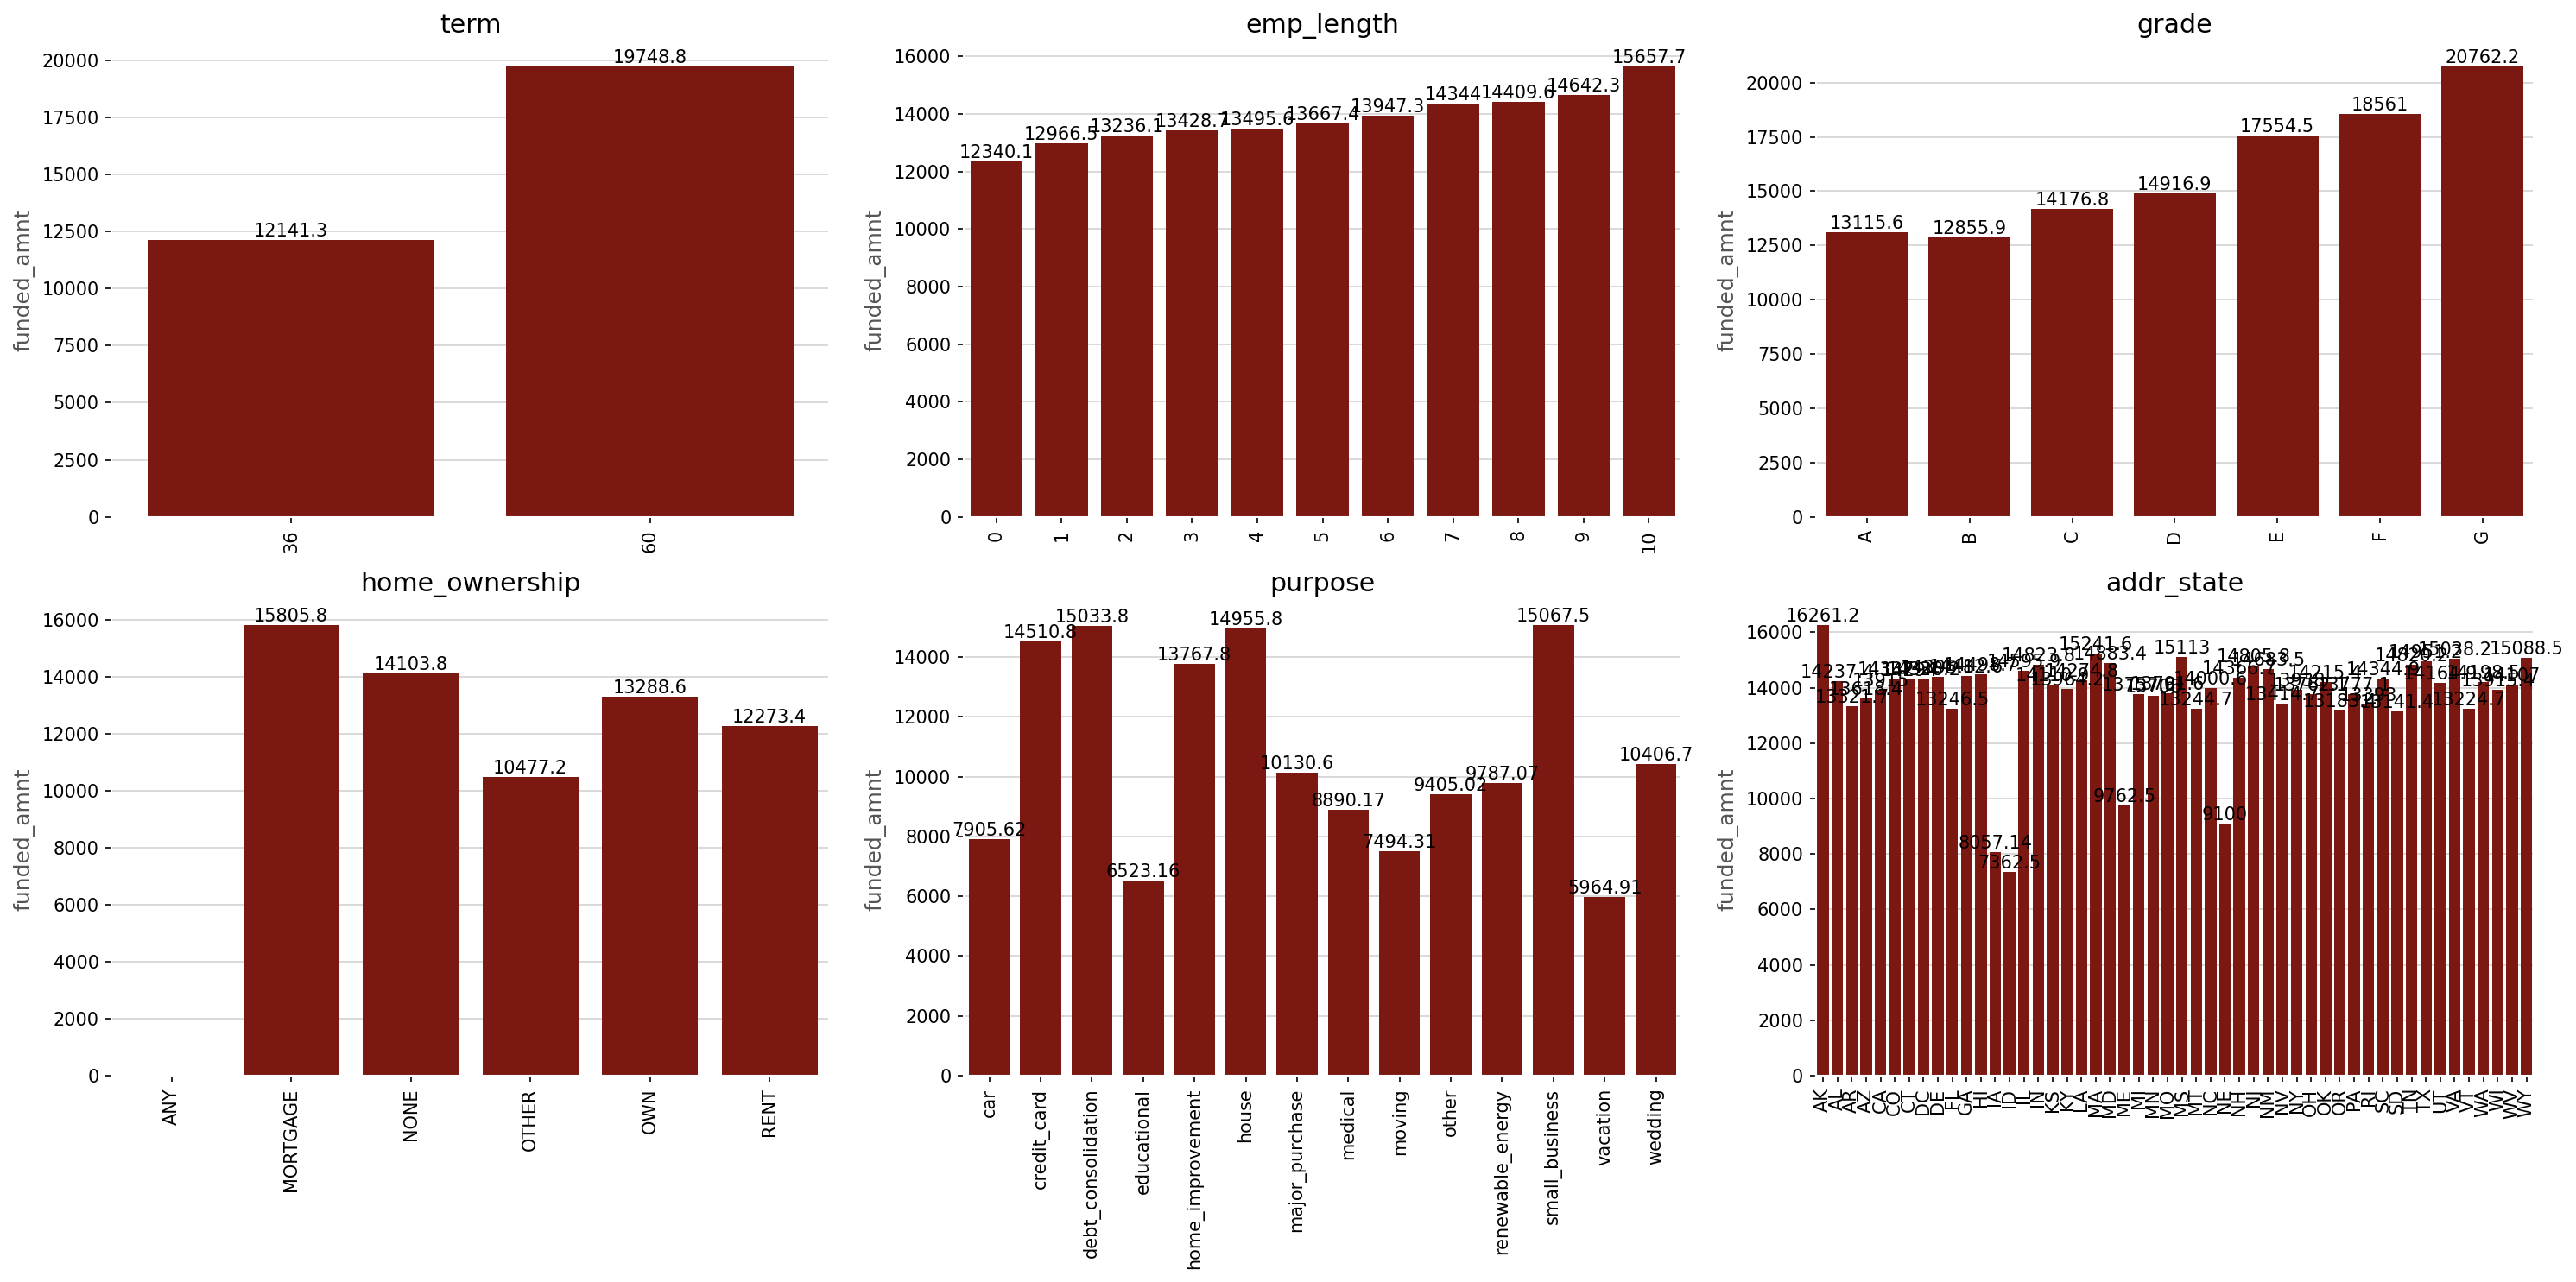

In [18]:
barplot_features = ['term', 'emp_length', 'grade', 'home_ownership', 'purpose', 'addr_state']
sns_plots(data=train, features=barplot_features, barplot=True, barplot_y='funded_amnt', rotation=90)

Insights:
- The average credit amount funded for 60-month loans is 1.62 times greater than the funded amount for 36-month loans.
- On average, the higher the employee length, the higher the credit amount funded, although the difference is not very substantial. Similarly, the applicant's grade also influences the funded amount positively. Specifically, the average credit amount funded for G grade applicants is 1.58 times higher than the average credit amount funded for A grade applicants. This serves as motivation for our project, highlighting potential discrepancies in Lending Club's decision-making. Allocating more credit to G grade individuals, who constitute a minority and may lead to higher potential losses.
- On average, the highest credit amounts were funded for purposes such as credit card, debt consolidation, house, and small business.
- On average, the credit amount funded is relatively evenly distributed among different states.

#### 2.7.3 How is the distribution of good and bad borrowers across different categories of variables?

#### 2.7.3.1 Grade

In [26]:
grade_df = default_analysis(train['grade'], 'grade', train, continuous=False, not_ordered=True)
grade_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
grade_cat,,,,,,,,,,,
G,2618,0.70,71.01,28.99,1859.0,759.0,0.57,1.70,2.45,-1.1,0.01
F,10700,2.87,74.64,25.36,7987.0,2713.0,2.43,6.07,2.94,-0.91,0.03
E,27880,7.47,79.07,20.93,22046.0,5834.0,6.72,13.05,3.78,-0.66,0.04
D,61044,16.37,83.27,16.73,50831.0,10213.0,15.48,22.85,4.98,-0.39,0.03
C,99372,26.64,87.30,12.70,86756.0,12616.0,26.43,28.22,6.88,-0.07,0.00
B,113166,30.34,91.21,8.79,103223.0,9943.0,31.44,22.24,10.38,0.35,0.03
A,58224,15.61,95.49,4.51,55598.0,2626.0,16.94,5.87,21.17,1.06,0.12
total,373004,100.00,88.02,11.98,328300.0,44704.0,100.00,100.00,-,-,0.26


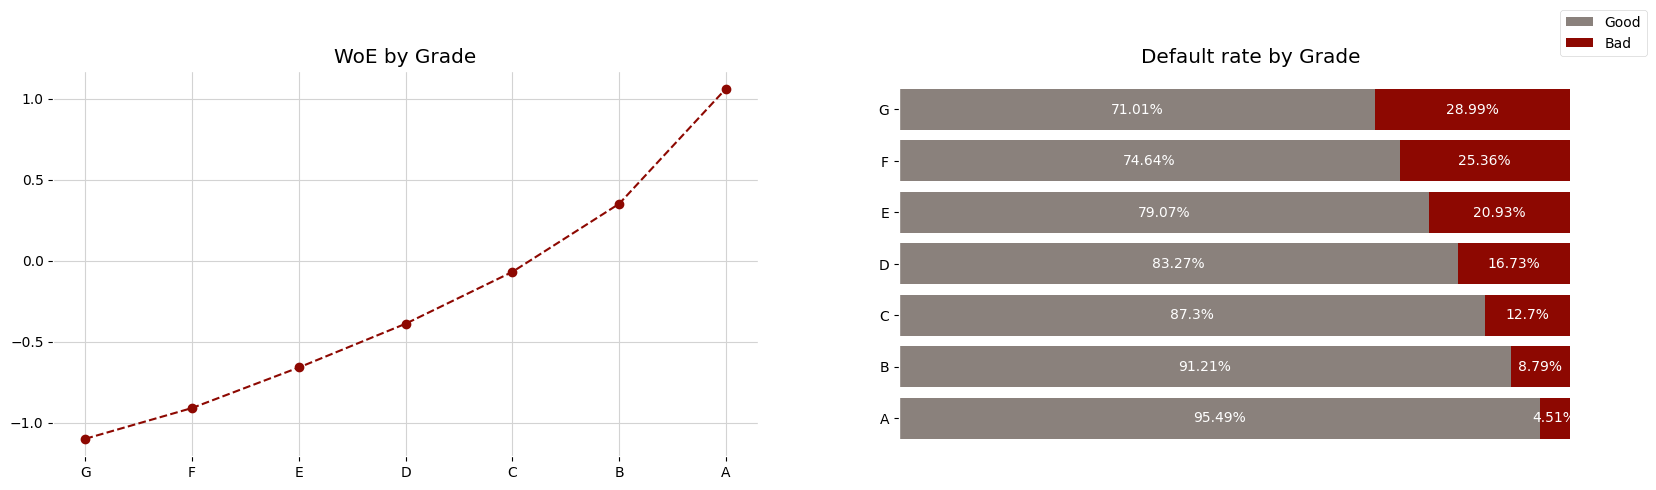

In [5]:
plot_woe_bad_rate_by_variable(grade_df, 'Grade')

Insights:
- It is possible to see a monotonic decreasing in default rate as the applicant's grade increases (from G to A). The higher the applicant's grade, the lower the credit risk. G grade bad rate is 6.4 times higher than A grade bad rate.
- A dummy for each grade can be created because all the categories have a significant number of observations and a distinct discriminatory power. G will be the reference category as it presents the highest credit risk.

#### 2.7.3.2 Home Ownership

In [22]:
home_own_df = default_analysis(train['home_ownership'], 'home_ownership', train, continuous=False, not_ordered=True)
home_own_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
home_ownership_cat,,,,,,,,,,,
OTHER,182,0.05,79.12,20.88,144.0,38.0,0.04,0.09,3.79,-0.66,0.00
NONE,46,0.01,82.61,17.39,38.0,8.0,0.01,0.02,4.75,-0.44,0.00
RENT,151095,40.51,86.24,13.76,130310.0,20785.0,39.69,46.49,6.27,-0.16,0.01
OWN,32033,8.59,87.92,12.08,28165.0,3868.0,8.58,8.65,7.28,-0.01,0.00
MORTGAGE,189648,50.84,89.45,10.55,169643.0,20005.0,51.67,44.75,8.48,0.14,0.01
ANY,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total,373004,100.00,88.02,11.98,328300.0,44704.0,100.00,100.00,-,-,0.02


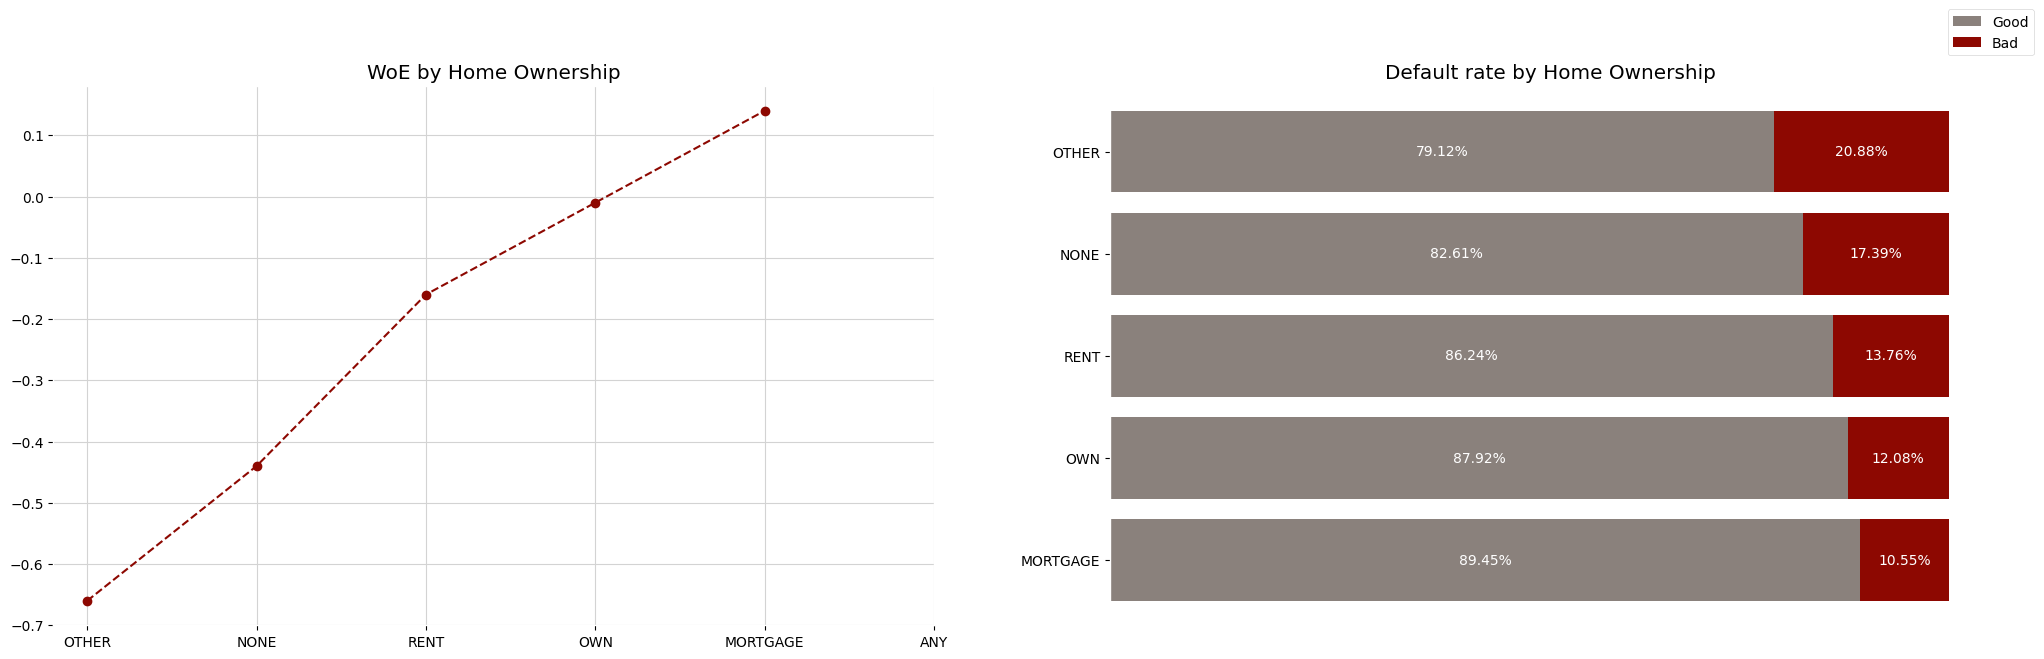

In [27]:
plot_woe_bad_rate_by_variable(home_own_df, 'Home Ownership', figsize=(25, 7))

Insights:
- Once 'Other' and 'None' categories present the lowest WoE, highest credit risk and compose a very low number of observations (around 0.06% of the total data), they will be bundled together. 'Any' will also be grouped with them because it does not have any observation. Probably, a very few 'Any' data points were left in the test set. Thus, these three categories will be grouped and separated as our reference category for home ownership variable.
- 'Rent', 'Own' and 'Mortgage' present significant number of observations and distinct discriminatory powers. Thus, I will create a separate dummy for each one.

#### 2.7.3.3 Purpose

In [29]:
purpose_df = default_analysis(train['purpose'], 'purpose', train, continuous=False, not_ordered=True)
purpose_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
purpose_cat,,,,,,,,,,,
small_business,6178,1.66,77.08,22.92,4762.0,1416.0,1.45,3.17,3.36,-0.78,0.01
educational,422,0.11,79.15,20.85,334.0,88.0,0.10,0.20,3.8,-0.66,0.00
renewable_energy,292,0.08,82.88,17.12,242.0,50.0,0.07,0.11,4.84,-0.42,0.00
moving,2380,0.64,84.20,15.80,2004.0,376.0,0.61,0.84,5.33,-0.32,0.00
other,19138,5.13,84.84,15.16,16237.0,2901.0,4.95,6.49,5.6,-0.27,0.00
house,1974,0.53,85.36,14.64,1685.0,289.0,0.51,0.65,5.83,-0.23,0.00
medical,3691,0.99,85.64,14.36,3161.0,530.0,0.96,1.19,5.96,-0.21,0.00
vacation,2037,0.55,87.33,12.67,1779.0,258.0,0.54,0.58,6.9,-0.06,0.00
debt_consolidation,216613,58.07,87.54,12.46,189614.0,26999.0,57.76,60.40,7.02,-0.04,0.00


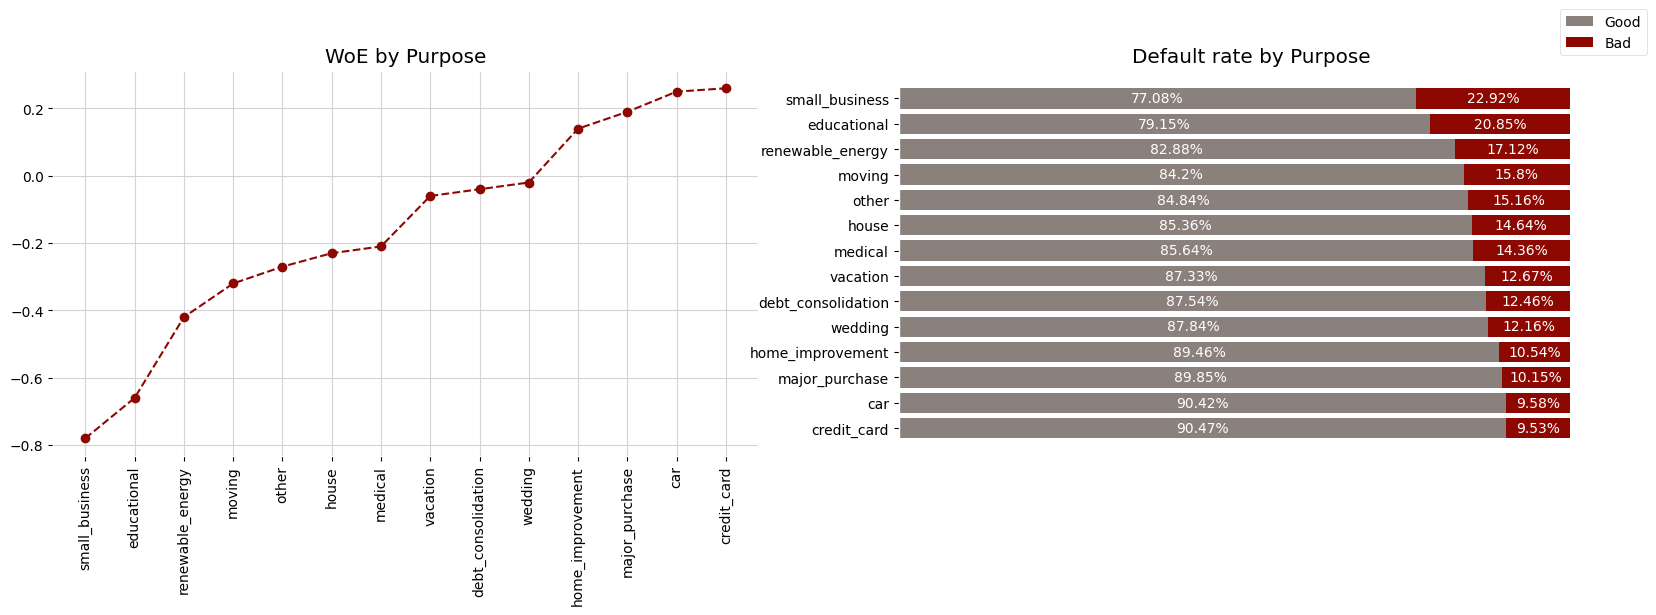

In [81]:
plot_woe_bad_rate_by_variable(purpose_df, 'Purpose', rotation=90)

Insights:
- Small business, educational and renewable energy are the top 3 loans purposes with highest credit risk. Credit card, car and major_purchase are the top 3 with lowest credit risk.
- small_business, educational, renewable_energy and moving will be bundled together due to the low proportions of observations and commonly high credit risk. Once they have the highest WoE (and risk), they will compose our reference category for purpose.
- other, house, medical and vacation will be bundled together due to the low proportions of observations and similar credit risk.
- debt_consolidation will have its own dummy variable because of the high proportion of observations (about 58%).
- wedding, home_improvement, major_purchase and car will be bundled together due to their low proportion of observations and similar risk.
- credit_card will have its own dummy variable because of the high proportion of observations (about 22%).

#### 2.7.3.4 Address State

In [60]:
addr_state_df = default_analysis(train['addr_state'], 'addr_state', train, continuous=False, not_ordered=True)
#addr_state_df

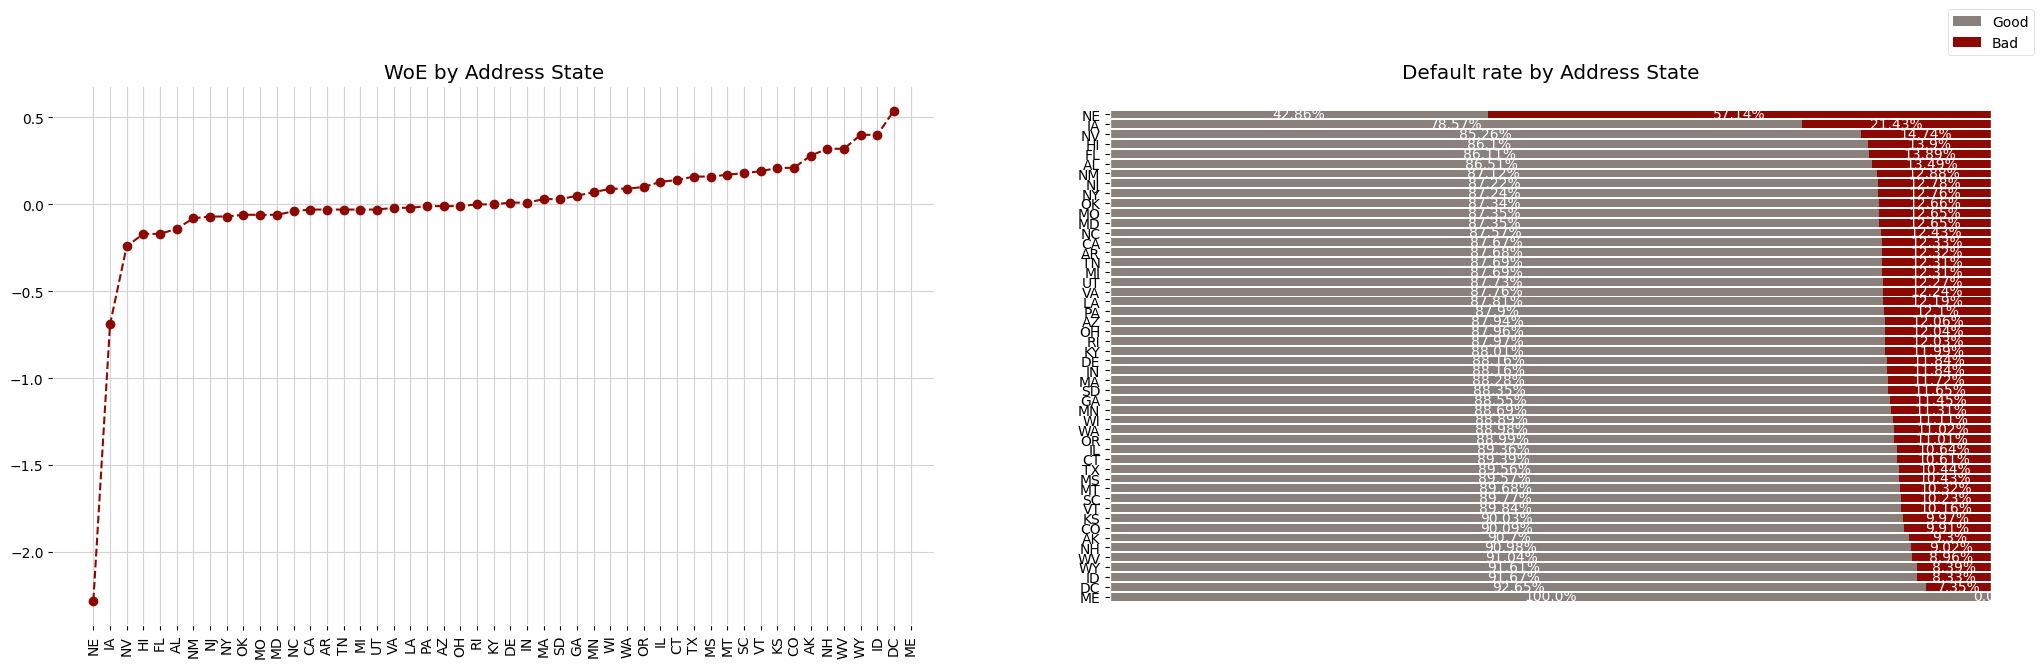

In [80]:
plot_woe_bad_rate_by_variable(addr_state_df, 'Address State', figsize=(25, 7), rotation=90)

Insights:
- NE, IA, NV and HI will be bundled together because of the extremely low proportions of observations, which causes these WoE values. These will compose our reference category for addr_state, because they present the highest risk.
- FL will have its own dummy variable because of its significant proportion of observations.
- AL, NM and NJ will be bundled together because of their low proportions of observations and similar WoE.
- NY will have its own dummy variable because of its significant proportion of observations.
- OK, MO, MD and NC will be bundled together because of their low proportions of observations and similar WoE.
- CA will have its own dummy variable because of its significant proportion of observations.
- AR to IN will be bundled together because of their low proportions of observations and similar WoE.
- MA to CT will be bundled together because of their low proportions of observations and similar WoE.
- TX will have its own dummy variable because of its significant proportion of observations.
- MS to CO will be bundled together because of their low proportions of observations and similar WoE.
- AK to ME will be bundled together because of their low proportions of observations and similar WoE.

#### 2.7.3.5 Initial List Status and Verification List Status

In [64]:
initial_list_status_df = default_analysis(train['initial_list_status'], 'initial_list_status', train, continuous=False, not_ordered=True)
initial_list_status_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
initial_list_status_cat,,,,,,,,,,,
f,260617,69.87,87.14,12.86,227094.0,33523.0,69.17,74.99,6.77,-0.08,0.00
w,112387,30.13,90.05,9.95,101206.0,11181.0,30.83,25.01,9.05,0.21,0.01
total,373004,100.00,88.02,11.98,328300.0,44704.0,100.00,100.00,-,-,0.01


In [68]:
verification_status_df = default_analysis(train['verification_status'], 'verification_status', train, continuous=False, not_ordered=True)
verification_status_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
verification_status_cat,,,,,,,,,,,
Verified,142081,38.09,86.44,13.56,122821.0,19260.0,37.41,43.08,6.38,-0.14,0.01
Source Verified,111264,29.83,88.41,11.59,98368.0,12896.0,29.96,28.85,7.63,0.04,0.00
Not Verified,119659,32.08,89.51,10.49,107111.0,12548.0,32.63,28.07,8.54,0.15,0.01
total,373004,100.00,88.02,11.98,328300.0,44704.0,100.00,100.00,-,-,0.02


Insights:
- Although initial_list_status and verification_status does not show a strong discriminatory power, there is some discrimination between good and bad borrowers across its categories. Thus, dummies will be created for each of them. The reference categories will be those with highest credit risk or lowest WoE. In case they are not useful for predicting PD, we can remove using p-values or another feature selection method later.

#### 2.7.3.6 Sub Grade

In [66]:
sub_grade_df = default_analysis(train['sub_grade'], 'sub_grade', train, continuous=False, not_ordered=True)
#sub_grade_df

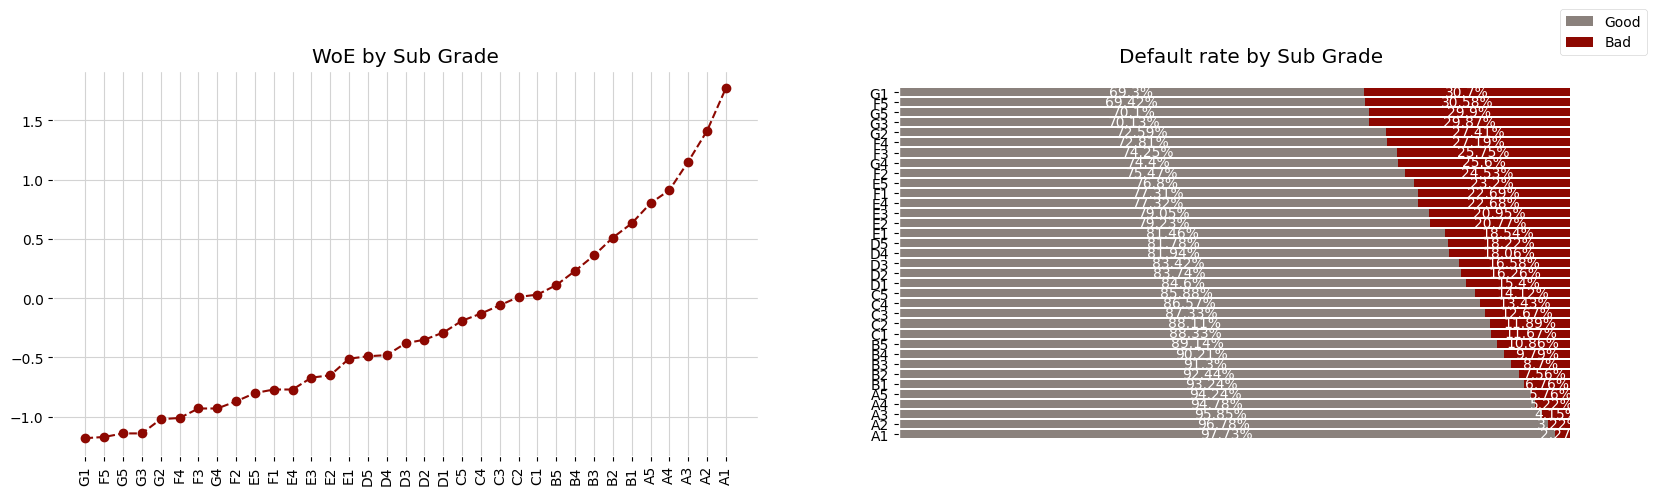

In [79]:
plot_woe_bad_rate_by_variable(sub_grade_df, 'Sub Grade', rotation=90)

Insights:
- As expected, the bad rate consistently decreases monotonically as the subgrade increases.


#### 2.7.3.7 Term

In [71]:
term_df = default_analysis(train['term'], 'term', train, continuous=False, not_ordered=True)
term_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
term_cat,,,,,,,,,,,
60,98782,26.48,84.04,15.96,83014.0,15768.0,25.29,35.27,5.26,-0.33,0.03
36,274222,73.52,89.45,10.55,245286.0,28936.0,74.71,64.73,8.48,0.14,0.01
total,373004,100.00,88.02,11.98,328300.0,44704.0,100.00,100.00,-,-,0.04


Insights:
- 60-month term loans tend to present higher risk. The bad rate on it (about 16%) is 1.5 times higher 36-month term bad rate (about 10.5%).
- Term will have its own dummy created because it presents a significant discriminatory power. Moreover, 60-month term will be the reference category because it presents the highest risk.

#### 2.7.3.8 Employee Length

In [6]:
emp_len_df = default_analysis(train['emp_length'], 'emp_length', train, continuous=False, not_ordered=False)
emp_len_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
emp_length_cat,,,,,,,,,,,
0,44830,12.02,86.50,13.50,38779.0,6051.0,11.81,13.54,6.41,-0.14,0.0
1,23816,6.38,87.86,12.14,20925.0,2891.0,6.37,6.47,7.24,-0.01,0.0
2,33148,8.89,87.94,12.06,29152.0,3996.0,8.88,8.94,7.3,-0.01,0.0
3,29331,7.86,87.96,12.04,25800.0,3531.0,7.86,7.90,7.31,-0.01,0.0
4,22456,6.02,87.91,12.09,19742.0,2714.0,6.01,6.07,7.27,-0.01,0.0
5,25890,6.94,87.59,12.41,22678.0,3212.0,6.91,7.19,7.06,-0.04,0.0
6,21746,5.83,87.28,12.72,18980.0,2766.0,5.78,6.19,6.86,-0.07,0.0
7,21239,5.69,87.79,12.21,18646.0,2593.0,5.68,5.80,7.19,-0.02,0.0
8,17752,4.76,87.86,12.14,15597.0,2155.0,4.75,4.82,7.24,-0.01,0.0


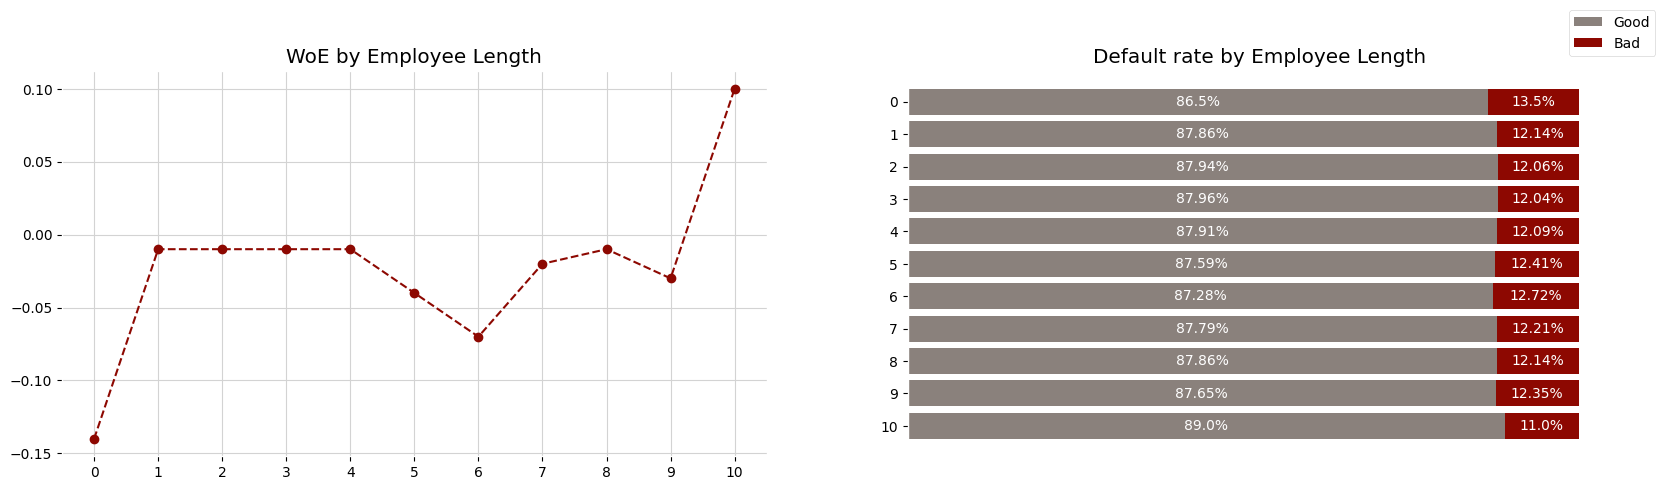

In [7]:
plot_woe_bad_rate_by_variable(emp_len_df, 'Employee Length')

Insights:
- All the employee length categories have similar bad rates. However, there is a very slight trend indicating that shorter employee lengths may be riskier.
- 0 will be the reference category because it present the lowest WoE and highest credit risk.
- 1, 2, 3, 4 and 5 will be bundled together because they present similar or same WoE.
- 6, 7, 8 and 9 will be bundled together because they present similar WoE.
- 10 will have its own dummy variable because it has the highest proportion of observations and distinct WoE (also the highest).

#### 2.7.3.9 Interest Rate

In [33]:
int_rate_df = default_analysis(pd.cut(train['int_rate'], 10), 'int_rate', train, continuous=True, not_ordered=False)
int_rate_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
int_rate_cat,,,,,,,,,,,
5-7,19492,5.23,97.02,2.98,18911.0,581.0,5.76,1.30,32.55,1.49,0.07
7-10,42064,11.28,94.81,5.19,39880.0,2184.0,12.15,4.89,18.26,0.91,0.07
10-12,49071,13.16,92.13,7.87,45209.0,3862.0,13.77,8.64,11.71,0.47,0.02
12-14,73302,19.65,90.07,9.93,66023.0,7279.0,20.11,16.28,9.07,0.21,0.01
14-16,70651,18.94,87.79,12.21,62028.0,8623.0,18.89,19.29,7.19,-0.02,0.00
16-18,50869,13.64,83.83,16.17,42646.0,8223.0,12.99,18.39,5.19,-0.35,0.02
18-20,31693,8.50,81.35,18.65,25783.0,5910.0,7.85,13.22,4.36,-0.52,0.03
20-22,16967,4.55,79.47,20.53,13484.0,3483.0,4.11,7.79,3.87,-0.64,0.02
22-24,12318,3.30,75.96,24.04,9357.0,2961.0,2.85,6.62,3.16,-0.84,0.03


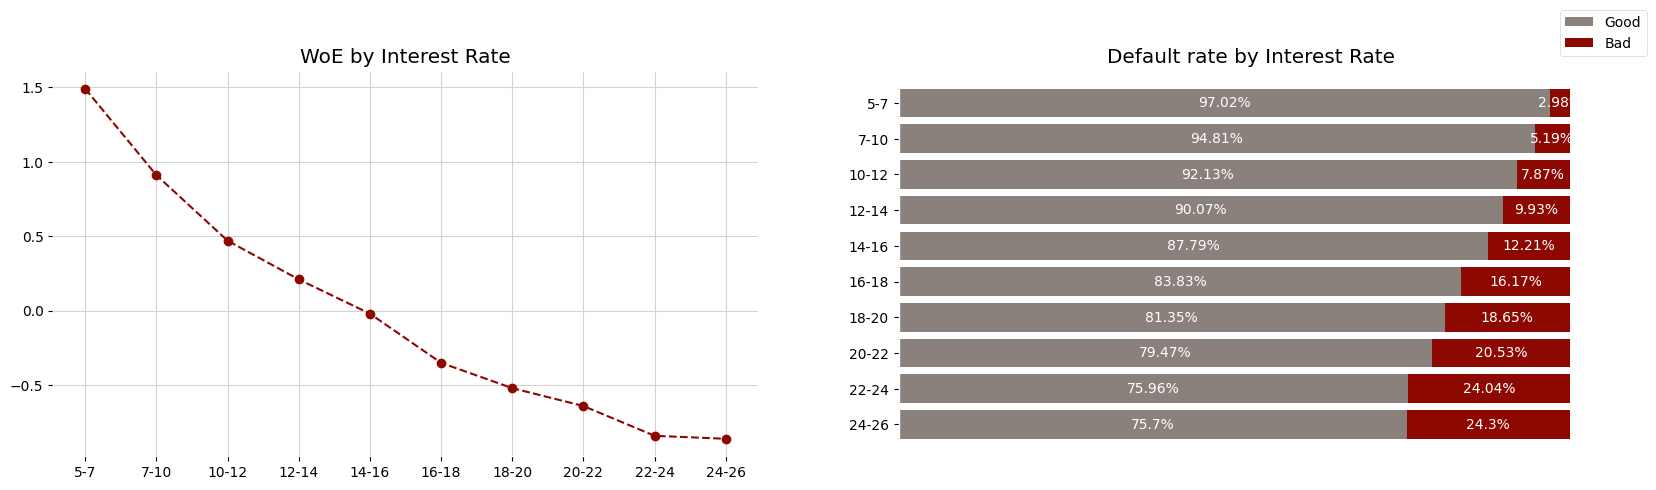

In [40]:
plot_woe_bad_rate_by_variable(int_rate_df, 'Interest Rate')

Insights:
- It is possible to see that the bad rate consistenly increases monotonically as the interest rate increases. Higher interest rates represent higher credit risk. Specifically, loans with more than 20% interest rate present about 8 times higher bad rate than those with 5% to 7% interest rate.
- 5-7, 7-10, 10-12, 12-14, 14-16, 16-18 will have their own category because of their distinct WoE.
- 18-20 and 20-22 will be bundled together because of their similar WoE.
- 22-24 and 24-26 will be bundled together because of their similar WoE. Moreover, these categories represent the highest credit risk and lowest WoE. Thus, they will be our reference category for interest rate.

#### 2.7.3.10 Loan Amount

In [52]:
loan_amnt_df = default_analysis(pd.cut(train['loan_amnt'], 10), 'loan_amnt', train, continuous=True, not_ordered=False)
loan_amnt_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
loan_amnt_cat,,,,,,,,,,,
466-3950,22765,6.10,88.33,11.67,20109.0,2656.0,6.13,5.94,7.57,0.03,0.0
3950-7400,61364,16.45,88.78,11.22,54479.0,6885.0,16.59,15.40,7.91,0.07,0.0
7400-10850,74362,19.94,88.11,11.89,65522.0,8840.0,19.96,19.77,7.41,0.01,0.0
10850-14300,52014,13.94,88.58,11.42,46075.0,5939.0,14.03,13.29,7.76,0.05,0.0
14300-17750,48429,12.98,87.73,12.27,42489.0,5940.0,12.94,13.29,7.15,-0.03,0.0
17750-21200,46326,12.42,87.72,12.28,40636.0,5690.0,12.38,12.73,7.14,-0.03,0.0
21200-24650,20216,5.42,87.57,12.43,17704.0,2512.0,5.39,5.62,7.05,-0.04,0.0
24650-28100,20543,5.51,87.22,12.78,17918.0,2625.0,5.46,5.87,6.83,-0.07,0.0
28100-31550,10570,2.83,86.21,13.79,9112.0,1458.0,2.78,3.26,6.25,-0.16,0.0


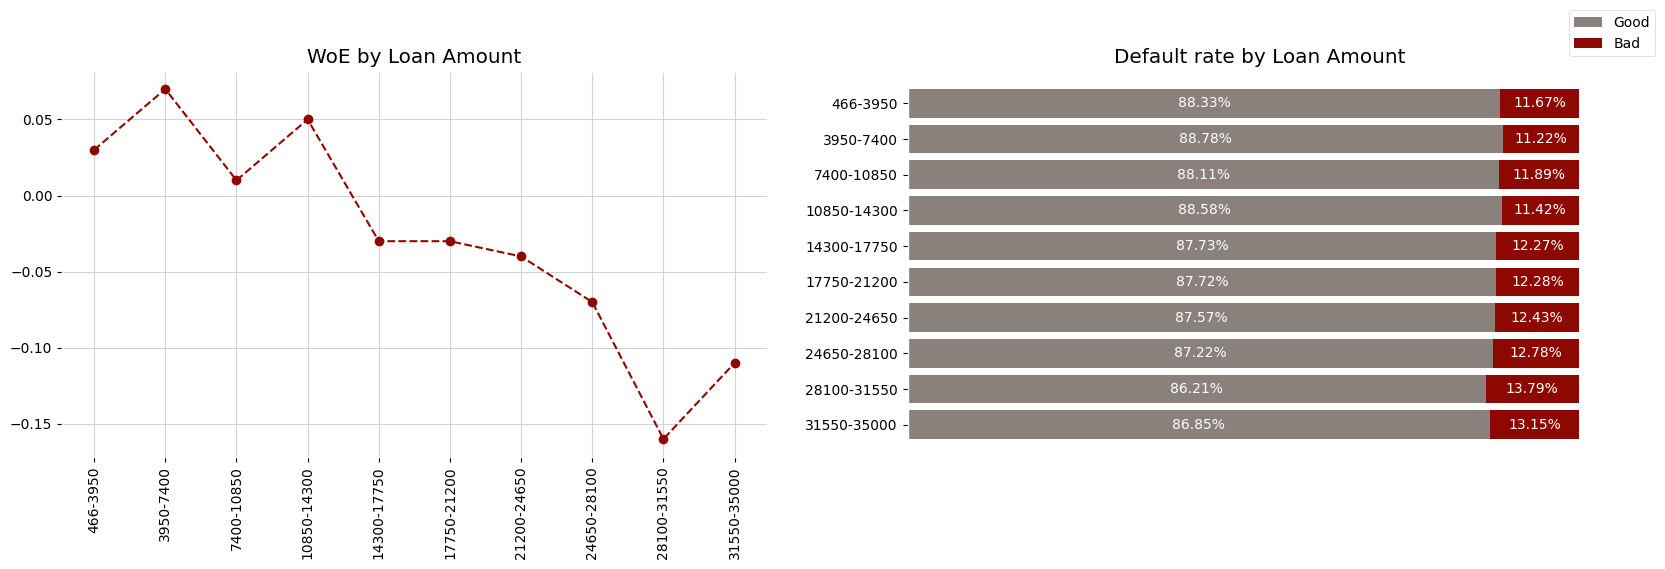

In [55]:
plot_woe_bad_rate_by_variable(loan_amnt_df, 'Loan Amount', rotation=90)

Insights:
- The bad rates are fairly distributed across different loan amount bins. 
- Loan Amounts from 466 to 14300 and 14300-28100 will be bundled together because of their similar WoE.
- Loan Amounts from 28100 to 35000 will be bundled together because of their similar WoE. Moreover, once these categories present the higher credit risks, they will be our reference category for loan amount variable.

#### 2.7.3.11 Debt to Income

In [61]:
dti_df = default_analysis(pd.cut(train['dti'], 10), 'dti', train, continuous=True, not_ordered=False)
dti_df

,n_obs,obs_proportion (%),good_row (%),bad_row (%),n_good,n_bad,good_col (%),bad_col (%),g/b,woe,iv
dti_cat,,,,,,,,,,,
0-4,14277,3.83,89.82,10.18,12823.0,1454.0,3.91,3.25,8.82,0.18,0.00
4-8,35629,9.55,90.55,9.45,32263.0,3366.0,9.83,7.53,9.58,0.27,0.01
8-12,56854,15.24,89.74,10.26,51022.0,5832.0,15.54,13.05,8.75,0.18,0.00
12-16,69800,18.71,89.04,10.96,62151.0,7649.0,18.93,17.11,8.13,0.1,0.00
16-20,68046,18.24,87.76,12.24,59717.0,8329.0,18.19,18.63,7.17,-0.02,0.00
20-24,57297,15.36,86.46,13.54,49541.0,7756.0,15.09,17.35,6.39,-0.14,0.00
24-28,39242,10.52,85.79,14.21,33665.0,5577.0,10.25,12.48,6.04,-0.2,0.00
28-32,22799,6.11,85.26,14.74,19438.0,3361.0,5.92,7.52,5.78,-0.24,0.00
32-36,8899,2.39,84.74,15.26,7541.0,1358.0,2.30,3.04,5.55,-0.28,0.00


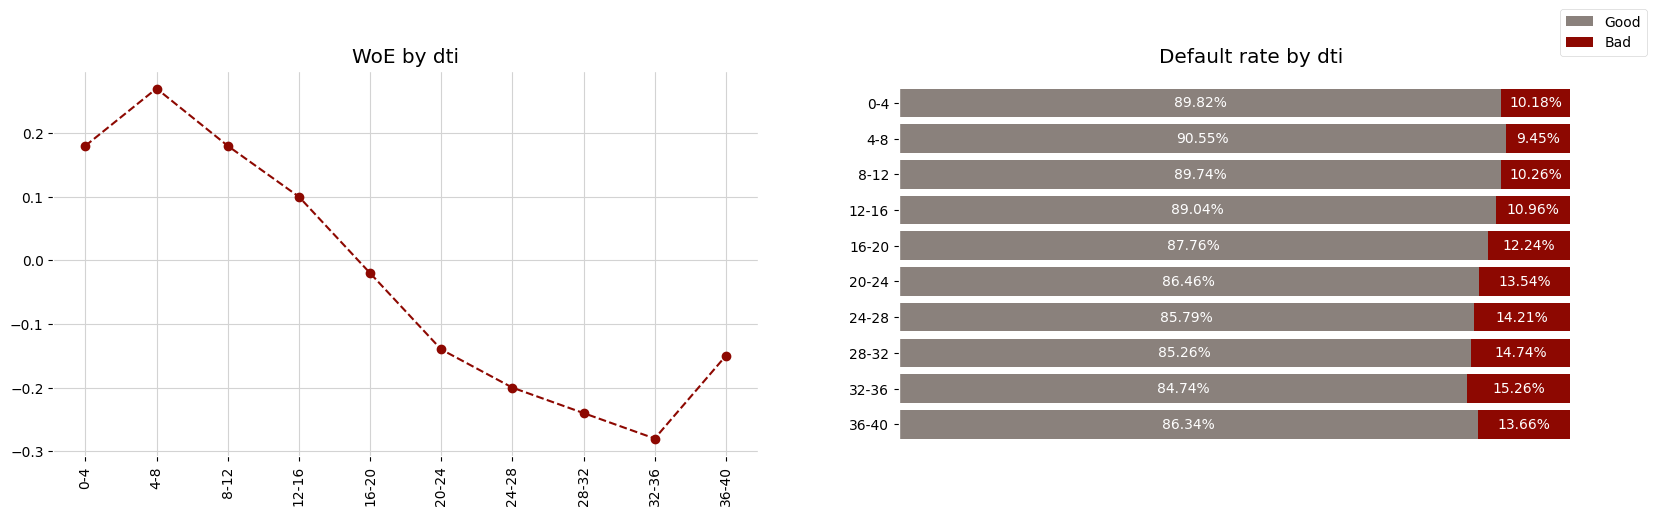

In [64]:
plot_woe_bad_rate_by_variable(dti_df, 'dti', rotation=90)

Insights:
- Although the differences are not so expressive, the highest the debt-to-income ratio, the highest the credit risk. Applicants with a debt-to-income ratio of 32 to 36 percent present a 1.5 times higher default rate compared to applicants with a debt-to-income ratio of 0 to 4 percent.
- 

In [56]:
train['dti'].describe().T

count    373004.000000
mean         16.823301
std           7.609460
min           0.000000
25%          11.140000
50%          16.559999
75%          22.320000
max          39.950001
Name: dti, dtype: float64

In [70]:
to_analyze_numeric = ['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
 'revol_util', 'total_acc', 'acc_now_delinq', 'tot_cur_bal',
 'mths_since_earliest_cr_line']